# Figure 1 LT

Run some pathway enrichment - name clusters, make plots for first figure


Run with this command in docker container

docker run \
--rm \
-d \
--name scanpy2 \
-p 8880:8888 \
-e JUPYTER_ENABLE_LAB=YES \
-v /Users/efast/Documents/:/home/jovyan/work \
scanpy:1.4.6

## 1) Loading packages + data

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from gprofiler import GProfiler
from helper_functions import *

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [3]:
sc.settings.set_figure_params(dpi=80, dpi_save=300, vector_friendly=True)
# plt.rcParams['figure.figsize']=(5,5) #rescale figures

In [4]:
adata = sc.read(
    './sc_objects/LT_preprocessed.h5ad')

In [5]:
adata.var_names_make_unique()

In [6]:
adata

AnnData object with n_obs × n_vars = 15355 × 14408 
    obs: 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample', 'batch', 'rXist', 'leiden', 'umap_density_sample'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'diffmap_evals', 'draw_graph', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'sex_sample_colors', 'umap', 'umap_density_sample_params'
    obsm: 'X_diffmap', 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

## Check the previous clustering (Leiden 6 clusters 25 KNN, 0.4 resolution)

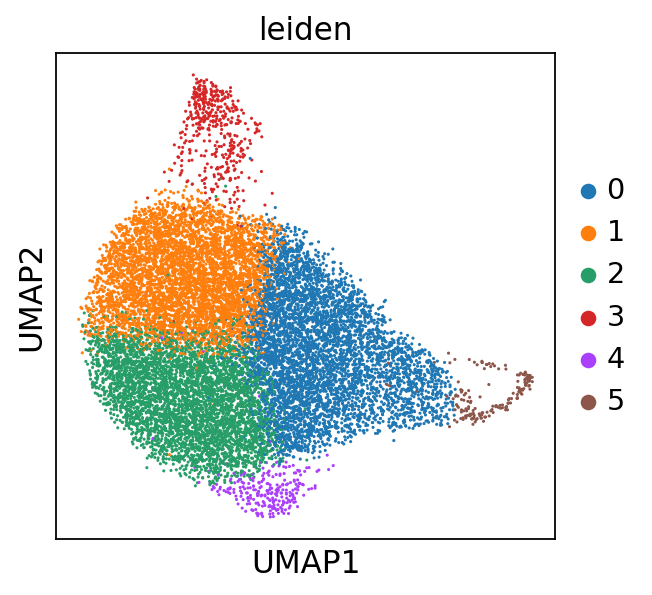

In [7]:
sc.pl.umap(adata, color='leiden')

## Look which signatures are enriched in the different clusters

In [8]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:15)


In [9]:
# which genes are enriched in which groups
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
enrichment_clusters = pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores']})
#.head(5)

In [10]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

0         1      2       3        4      5
0      Ran     Txnip  Nr4a1   Iigp1    Cebpb  H2afz
1    Eif5a     Rps24   Hes1   Isg15  Tsc22d3  Hmgb2
2      Mif     Rplp1  H3f3b   Ifit1    Plaur  Stmn1
3      Ncl       Fau   Ier2    Gbp7   Ifngr1  Hmgb1
4     Ppia     Mllt3   Junb   Oasl2    Anks1   Ptma
5     Nme1     Rps14   Klf2  Gm4951    Fosl2  Mki67
6     Pfn1      Rpl9    Fos  Ifitm3    Rps27  H2afv
7     Ptma     Rps27  Smad7    Rtp4   Ctla2a  Cks1b
8   Anp32b     Rpl30  Nr4a2    Igtp  Tsc22d1    Ran
9  Slc25a5  Pdzk1ip1   Rgs2  Ifi203    Klf13  Spc24

In [11]:
enrichment_clusters.to_csv('./write/all_LT_clusters.csv', index=False, header=True)

### Reactome

In [12]:
sources = ["REAC"]

pathway_enrich(enrichment_clusters['0_n'].tolist(), sources)

p_value  term_size  intersection_size    recall  \
native                                                                     
REAC:R-MMU-8953854  8.732336e-09        544                 23  0.042279   
REAC:R-MMU-72163    2.809937e-05        175                 11  0.062857   
REAC:R-MMU-72172    2.809937e-05        181                 11  0.060773   
REAC:R-MMU-72165    1.879502e-04         49                  6  0.122449   
REAC:R-MMU-3371568  1.879502e-04         13                  4  0.307692   
REAC:R-MMU-72203    1.879502e-04        231                 11  0.047619   
REAC:R-MMU-3371497  1.890129e-04         51                  6  0.117647   
REAC:R-MMU-3371571  1.364009e-03         22                  4  0.181818   
REAC:R-MMU-8852276  1.519354e-03         76                  6  0.078947   
REAC:R-MMU-72312    2.131655e-03        168                  8  0.047619   

                                                                         name  
native                                                                         
REAC:R-MMU-8953854                                          Metabolism of RNA  
REAC:R-MMU-72163                                mRNA Splicing - Major Pathway  
REAC:R-MMU-72172                                                mRNA Splicing  
REAC:R-MMU-72165                                mRNA Splicing - Minor Pathway  
REAC:R-MMU-3371568                                          Attenuation phase  
REAC:R-MMU-72203              Processing of Capped Intron-Containing Pre-mRNA  
REAC:R-MMU-3371497  HSP90 chaperone cycle for steroid hormone receptors (SHR)  
REAC:R-MMU-3371571                             HSF1-dependent transactivation  
REAC:R-MMU-8852276  The role of GTSE1 in G2/M progression after G2 checkpoint  
REAC:R-MMU-72312                                              rRNA processing

In [13]:
sources = ["REAC"]

pathway_enrich(enrichment_clusters['1_n'].tolist(), sources)

p_value  term_size  intersection_size    recall  \
native                                                                     
REAC:R-MMU-156827   7.549559e-42        108                 30  0.277778   
REAC:R-MMU-72706    7.549559e-42        109                 30  0.275229   
REAC:R-MMU-72689    1.686079e-41         98                 29  0.295918   
REAC:R-MMU-72737    2.567117e-41        116                 30  0.258621   
REAC:R-MMU-72613    2.567117e-41        116                 30  0.258621   
REAC:R-MMU-1799339  4.535140e-41         89                 28  0.314607   
REAC:R-MMU-975956   8.099463e-41         91                 28  0.307692   
REAC:R-MMU-927802   5.150470e-38        112                 28  0.250000   
REAC:R-MMU-975957   5.150470e-38        112                 28  0.250000   
REAC:R-MMU-72766    2.226143e-34        218                 31  0.142202   

                                                                                            name  
native                                                                                            
REAC:R-MMU-156827              L13a-mediated translational silencing of Ceruloplasmin expression  
REAC:R-MMU-72706                         GTP hydrolysis and joining of the 60S ribosomal subunit  
REAC:R-MMU-72689                                        Formation of a pool of free 40S subunits  
REAC:R-MMU-72737                                            Cap-dependent Translation Initiation  
REAC:R-MMU-72613                                               Eukaryotic Translation Initiation  
REAC:R-MMU-1799339                   SRP-dependent cotranslational protein targeting to membrane  
REAC:R-MMU-975956   Nonsense Mediated Decay (NMD) independent of the Exon Junction Complex (EJC)  
REAC:R-MMU-927802                                                  Nonsense-Mediated Decay (NMD)  
REAC:R-MMU-975957      Nonsense Mediated Decay (NMD) enhanced by the Exon Junction Complex (EJC)  
REAC:R-MMU-72766                                                                     Translation

In [14]:
sources = ["REAC"]

pathway_enrich_genes(enrichment_clusters['1_n'].tolist(), sources)

name  \
native                                                                                             
REAC:R-MMU-156827              L13a-mediated translational silencing of Ceruloplasmin expression   
REAC:R-MMU-72706                         GTP hydrolysis and joining of the 60S ribosomal subunit   
REAC:R-MMU-72689                                        Formation of a pool of free 40S subunits   
REAC:R-MMU-72737                                            Cap-dependent Translation Initiation   
REAC:R-MMU-72613                                               Eukaryotic Translation Initiation   
REAC:R-MMU-1799339                   SRP-dependent cotranslational protein targeting to membrane   
REAC:R-MMU-975956   Nonsense Mediated Decay (NMD) independent of the Exon Junction Complex (EJC)   
REAC:R-MMU-927802                                                  Nonsense-Mediated Decay (NMD)   
REAC:R-MMU-975957      Nonsense Mediated Decay (NMD) enhanced by the Exon Junction Complex (EJC)   
REAC:R-MMU-72766                                                                     Translation   

                         p_value  term_size    recall  \
native                                                  
REAC:R-MMU-156827   7.549559e-42        108  0.277778   
REAC:R-MMU-72706    7.549559e-42        109  0.275229   
REAC:R-MMU-72689    1.686079e-41         98  0.295918   
REAC:R-MMU-72737    2.567117e-41        116  0.258621   
REAC:R-MMU-72613    2.567117e-41        116  0.258621   
REAC:R-MMU-1799339  4.535140e-41         89  0.314607   
REAC:R-MMU-975956   8.099463e-41         91  0.307692   
REAC:R-MMU-927802   5.150470e-38        112  0.250000   
REAC:R-MMU-975957   5.150470e-38        112  0.250000   
REAC:R-MMU-72766    2.226143e-34        218  0.142202   

                                                                                                                                                                                                                             intersections  
native                                                                                                                                                                                                                                      
REAC:R-MMU-156827         [Rps24, Rplp1, Rps14, Rpl9, Rpl30, Rps4x, Rps9, Rpl7, Rpl13, Rps10, Rpl26, Rpl27a, Rpl19, Rps21, Rpl5, Rpl18a, Rpl23, Rps3a1, Rps23, Rps3, Rpl11, Rpl35a, Rps20, Rps29, Eif4a2, Eif3f, Rpl6, Rpl34, Rps7, Rpl12]  
REAC:R-MMU-72706          [Rps24, Rplp1, Rps14, Rpl9, Rpl30, Rps4x, Rps9, Rpl7, Rpl13, Rps10, Rpl26, Rpl27a, Rpl19, Rps21, Rpl5, Rpl18a, Rpl23, Rps3a1, Rps23, Rps3, Rpl11, Rpl35a, Rps20, Rps29, Eif4a2, Eif3f, Rpl6, Rpl34, Rps7, Rpl12]  
REAC:R-MMU-72689                  [Rps24, Rplp1, Rps14, Rpl9, Rpl30, Rps4x, Rps9, Rpl7, Rpl13, Rps10, Rpl26, Rpl27a, Rpl19, Rps21, Rpl5, Rpl18a, Rpl23, Rps3a1, Rps23, Rps3, Rpl11, Rpl35a, Rps20, Rps29, Eif3f, Rpl6, Rpl34, Rps7, Rpl12]  
REAC:R-MMU-72737          [Rps24, Rplp1, Rps14, Rpl9, Rpl30, Rps4x, Rps9, Rpl7, Rpl13, Rps10, Rpl26, Rpl27a, Rpl19, Rps21, Rpl5, Rpl18a, Rpl23, Rps3a1, Rps23, Rps3, Rpl11, Rpl35a, Rps20, Rps29, Eif4a2, Eif3f, Rpl6, Rpl34, Rps7, Rpl12]  
REAC:R-MMU-72613          [Rps24, Rplp1, Rps14, Rpl9, Rpl30, Rps4x, Rps9, Rpl7, Rpl13, Rps10, Rpl26, Rpl27a, Rpl19, Rps21, Rpl5, Rpl18a, Rpl23, Rps3a1, Rps23, Rps3, Rpl11, Rpl35a, Rps20, Rps29, Eif4a2, Eif3f, Rpl6, Rpl34, Rps7, Rpl12]  
REAC:R-MMU-1799339                       [Rps24, Rplp1, Rps14, Rpl9, Rpl30, Rps4x, Rps9, Rpl7, Rpl13, Rps10, Rpl26, Rpl27a, Rpl19, Rps21, Rpl5, Rpl18a, Rpl23, Rps3a1, Rps23, Rps3, Rpl11, Rpl35a, Rps20, Rps29, Rpl6, Rpl34, Rps7, Rpl12]  
REAC:R-MMU-975956                        [Rps24, Rplp1, Rps14, Rpl9, Rpl30, Rps4x, Rps9, Rpl7, Rpl13, Rps10, Rpl26, Rpl27a, Rpl19, Rps21, Rpl5, Rpl18a, Rpl23, Rps3a1, Rps23, Rps3, Rpl11, Rpl35a, Rps20, Rps29, Rpl6, Rpl34, Rps7, Rpl12]  
REAC:R-MMU-927802                        [Rps24, Rplp1, Rps14, Rpl9, Rpl3

In [15]:
sources = ["REAC"]

pathway_enrich(enrichment_clusters['2_n'].tolist(), sources)

p_value  term_size  intersection_size    recall  \
native                                                                 
REAC:R-MMU-8953897  0.001148        431                 11  0.025522   
REAC:R-MMU-2262752  0.001148        429                 11  0.025641   
REAC:R-MMU-2559583  0.002267        168                  7  0.041667   
REAC:R-MMU-2173793  0.002291         34                  4  0.117647   
REAC:R-MMU-5675221  0.003904         41                  4  0.097561   
REAC:R-MMU-170834   0.008309         54                  4  0.074074   
REAC:R-MMU-112409   0.008309         20                  3  0.150000   
REAC:R-MMU-2173796  0.010415         24                  3  0.125000   
REAC:R-MMU-74160    0.010415       1006                 14  0.013917   
REAC:R-MMU-73857    0.012700        907                 13  0.014333   

                                                                          name  
native                                                                          
REAC:R-MMU-8953897                      Cellular responses to external stimuli  
REAC:R-MMU-2262752                                Cellular responses to stress  
REAC:R-MMU-2559583                                         Cellular Senescence  
REAC:R-MMU-2173793  Transcriptional activity of SMAD2/SMAD3:SMAD4 heterotrimer  
REAC:R-MMU-5675221                         Negative regulation of MAPK pathway  
REAC:R-MMU-170834                       Signaling by TGF-beta Receptor Complex  
REAC:R-MMU-112409                           RAF-independent MAPK1/3 activation  
REAC:R-MMU-2173796      SMAD2/SMAD3:SMAD4 heterotrimer regulates transcription  
REAC:R-MMU-74160                               Gene expression (Transcription)  
REAC:R-MMU-73857                               RNA Polymerase II Transcription

In [16]:
sources = ["REAC"]

pathway_enrich(enrichment_clusters['3_n'].tolist(), sources)

p_value  term_size  intersection_size    recall  \
native                                                                     
REAC:R-MMU-1169410  2.555612e-07         32                  6  0.187500   
REAC:R-MMU-913531   2.555612e-07         63                  7  0.111111   
REAC:R-MMU-1169408  2.519768e-06         27                  5  0.185185   
REAC:R-MMU-168256   6.089565e-04       1715                 18  0.010496   
REAC:R-MMU-1280215  3.294381e-03        512                  9  0.017578   
REAC:R-MMU-8983711  4.623510e-03          6                  2  0.333333   
REAC:R-MMU-168928   4.623510e-03         30                  3  0.100000   
REAC:R-MMU-1280218  2.462136e-02        718                  9  0.012535   
REAC:R-MMU-197264   2.462136e-02         15                  2  0.133333   
REAC:R-MMU-983169   2.985879e-02        347                  6  0.017291   

                                                                       name  
native                                                                       
REAC:R-MMU-1169410              Antiviral mechanism by IFN-stimulated genes  
REAC:R-MMU-913531                                      Interferon Signaling  
REAC:R-MMU-1169408                                ISG15 antiviral mechanism  
REAC:R-MMU-168256                                             Immune System  
REAC:R-MMU-1280215                      Cytokine Signaling in Immune system  
REAC:R-MMU-8983711                                   OAS antiviral response  
REAC:R-MMU-168928   DDX58/IFIH1-mediated induction of interferon-alpha/beta  
REAC:R-MMU-1280218                                   Adaptive Immune System  
REAC:R-MMU-197264                                    Nicotinamide salvaging  
REAC:R-MMU-983169    Class I MHC mediated antigen processing & presentation

In [17]:
sources = ["REAC"]

pathway_enrich(enrichment_clusters['4_n'].tolist(), sources)

p_value  term_size  intersection_size    recall  \
native                                                                     
REAC:R-MMU-1799339  9.129018e-13         89                 13  0.146067   
REAC:R-MMU-975956   9.129018e-13         91                 13  0.142857   
REAC:R-MMU-72689    1.654897e-12         98                 13  0.132653   
REAC:R-MMU-72706    4.119211e-12        109                 13  0.119266   
REAC:R-MMU-156827   4.119211e-12        108                 13  0.120370   
REAC:R-MMU-927802   4.220254e-12        112                 13  0.116071   
REAC:R-MMU-975957   4.220254e-12        112                 13  0.116071   
REAC:R-MMU-72613    5.224462e-12        116                 13  0.112069   
REAC:R-MMU-72737    5.224462e-12        116                 13  0.112069   
REAC:R-MMU-72766    6.646385e-11        218                 15  0.068807   

                                                                                            name  
native                                                                                            
REAC:R-MMU-1799339                   SRP-dependent cotranslational protein targeting to membrane  
REAC:R-MMU-975956   Nonsense Mediated Decay (NMD) independent of the Exon Junction Complex (EJC)  
REAC:R-MMU-72689                                        Formation of a pool of free 40S subunits  
REAC:R-MMU-72706                         GTP hydrolysis and joining of the 60S ribosomal subunit  
REAC:R-MMU-156827              L13a-mediated translational silencing of Ceruloplasmin expression  
REAC:R-MMU-927802                                                  Nonsense-Mediated Decay (NMD)  
REAC:R-MMU-975957      Nonsense Mediated Decay (NMD) enhanced by the Exon Junction Complex (EJC)  
REAC:R-MMU-72613                                               Eukaryotic Translation Initiation  
REAC:R-MMU-72737                                            Cap-dependent Translation Initiation  
REAC:R-MMU-72766                                                                     Translation

In [18]:
sources = ["REAC"]

pathway_enrich_genes(enrichment_clusters['4_n'].tolist(), sources)

name  \
native                                                                                             
REAC:R-MMU-1799339                   SRP-dependent cotranslational protein targeting to membrane   
REAC:R-MMU-975956   Nonsense Mediated Decay (NMD) independent of the Exon Junction Complex (EJC)   
REAC:R-MMU-72689                                        Formation of a pool of free 40S subunits   
REAC:R-MMU-72706                         GTP hydrolysis and joining of the 60S ribosomal subunit   
REAC:R-MMU-156827              L13a-mediated translational silencing of Ceruloplasmin expression   
REAC:R-MMU-927802                                                  Nonsense-Mediated Decay (NMD)   
REAC:R-MMU-975957      Nonsense Mediated Decay (NMD) enhanced by the Exon Junction Complex (EJC)   
REAC:R-MMU-72613                                               Eukaryotic Translation Initiation   
REAC:R-MMU-72737                                            Cap-dependent Translation Initiation   
REAC:R-MMU-72766                                                                     Translation   

                         p_value  term_size    recall  \
native                                                  
REAC:R-MMU-1799339  9.129018e-13         89  0.146067   
REAC:R-MMU-975956   9.129018e-13         91  0.142857   
REAC:R-MMU-72689    1.654897e-12         98  0.132653   
REAC:R-MMU-72706    4.119211e-12        109  0.119266   
REAC:R-MMU-156827   4.119211e-12        108  0.120370   
REAC:R-MMU-927802   4.220254e-12        112  0.116071   
REAC:R-MMU-975957   4.220254e-12        112  0.116071   
REAC:R-MMU-72613    5.224462e-12        116  0.112069   
REAC:R-MMU-72737    5.224462e-12        116  0.112069   
REAC:R-MMU-72766    6.646385e-11        218  0.068807   

                                                                                                                   intersections  
native                                                                                                                            
REAC:R-MMU-1799339                [Rps28, Rpl37, Rps21, Rps29, Rpl39, Rpl38, Rpl35a, Rpl34, Rplp2, Rpl30, Rpl27, Rplp1, Gm11808]  
REAC:R-MMU-975956                 [Rps28, Rpl37, Rps21, Rps29, Rpl39, Rpl38, Rpl35a, Rpl34, Rplp2, Rpl30, Rpl27, Rplp1, Gm11808]  
REAC:R-MMU-72689                  [Rps28, Rpl37, Rps21, Rps29, Rpl39, Rpl38, Rpl35a, Rpl34, Rplp2, Rpl30, Rpl27, Rplp1, Gm11808]  
REAC:R-MMU-72706                  [Rps28, Rpl37, Rps21, Rps29, Rpl39, Rpl38, Rpl35a, Rpl34, Rplp2, Rpl30, Rpl27, Rplp1, Gm11808]  
REAC:R-MMU-156827                 [Rps28, Rpl37, Rps21, Rps29, Rpl39, Rpl38, Rpl35a, Rpl34, Rplp2, Rpl30, Rpl27, Rplp1, Gm11808]  
REAC:R-MMU-927802                 [Rps28, Rpl37, Rps21, Rps29, Rpl39, Rpl38, Rpl35a, Rpl34, Rplp2, Rpl30, Rpl27, Rplp1, Gm11808]  
REAC:R-MMU-975957                 [Rps28, Rpl37, Rps21, Rps29, Rpl39, Rpl38, Rpl35a, Rpl34, Rplp2, Rpl30, Rpl27, Rplp1, Gm11808]  
REAC:R-MMU-72613                  [Rps28, Rpl37, Rps21, Rps29, Rpl39, Rpl38, Rpl35a, Rpl34, Rplp2, Rpl30, Rpl27, Rplp1, Gm11808]  
REAC:R-MMU-72737                  [Rps28, Rpl37, Rps21, Rps29, Rpl39, Rpl38, Rpl35a, Rpl34, Rplp2, Rpl30, Rpl27, Rplp1, Gm11808]  
REAC:R-MMU-72766    [Rps28, Rpl37, Rps21, Rps29, Rpl39, Rpl38, Rpl35a, Eef2, Rpl34, Rplp2, Rpl30, Eef1a1, Rpl27, Rplp1, Gm11808]

In [19]:
sources = ["REAC"]

pathway_enrich(enrichment_clusters['5_n'].tolist(), sources)

p_value  term_size  intersection_size    recall  \
native                                                                     
REAC:R-MMU-1640170  2.139090e-24        553                 36  0.065099   
REAC:R-MMU-69278    5.529187e-24        487                 34  0.069815   
REAC:R-MMU-68877    4.708863e-18        184                 21  0.114130   
REAC:R-MMU-2500257  1.675762e-16        114                 17  0.149123   
REAC:R-MMU-68886    1.675762e-16        372                 25  0.067204   
REAC:R-MMU-69620    7.238402e-16        277                 22  0.079422   
REAC:R-MMU-5663220  6.104533e-13        128                 15  0.117188   
REAC:R-MMU-141444   1.316020e-12         87                 13  0.149425   
REAC:R-MMU-141424   1.316020e-12         87                 13  0.149425   
REAC:R-MMU-2555396  7.418380e-12        188                 16  0.085106   

                                                                                                    name  
native                                                                                                    
REAC:R-MMU-1640170                                                                            Cell Cycle  
REAC:R-MMU-69278                                                                     Cell Cycle, Mitotic  
REAC:R-MMU-68877                                                                    Mitotic Prometaphase  
REAC:R-MMU-2500257                                               Resolution of Sister Chromatid Cohesion  
REAC:R-MMU-68886                                                                                 M Phase  
REAC:R-MMU-69620                                                                  Cell Cycle Checkpoints  
REAC:R-MMU-5663220                                                          RHO GTPases Activate Formins  
REAC:R-MMU-141444   Amplification  of signal from unattached  kinetochores via a MAD2  inhibitory signal  
REAC:R-MMU-141424                                          Amplification of signal from the kinetochores  
REAC:R-MMU-2555396                                                        Mitotic Metaphase and Anaphase

### GO database

In [20]:
sources = ["GO:MF","GO:BP"]

pathway_enrich(enrichment_clusters['0_n'].tolist(), sources)

p_value  term_size  intersection_size    recall  \
native                                                             
GO:0003723  1.415550e-24       1250                 43  0.034400   
GO:1901363  1.814962e-16       5841                 69  0.011813   
GO:0097159  3.448567e-16       5946                 69  0.011604   
GO:0022613  1.375755e-15        406                 23  0.056650   
GO:0034641  1.703381e-15       6134                 70  0.011412   
GO:0044237  6.625292e-14      10325                 86  0.008329   
GO:0003676  8.972417e-13       3734                 51  0.013658   
GO:0006807  1.243925e-12       9684                 82  0.008468   
GO:0006139  3.310031e-12       5379                 61  0.011340   
GO:0046483  9.350730e-12       5514                 61  0.011063   

                                                        name  
native                                                        
GO:0003723                                       RNA binding  
GO:1901363                     heterocyclic compound binding  
GO:0097159                   organic cyclic compound binding  
GO:0022613              ribonucleoprotein complex biogenesis  
GO:0034641      cellular nitrogen compound metabolic process  
GO:0044237                        cellular metabolic process  
GO:0003676                              nucleic acid binding  
GO:0006807               nitrogen compound metabolic process  
GO:0006139  nucleobase-containing compound metabolic process  
GO:0046483                     heterocycle metabolic process

In [21]:
sources = ["GO:MF","GO:BP"]

pathway_enrich(enrichment_clusters['1_n'].tolist(), sources)

p_value  term_size  intersection_size    recall  \
native                                                             
GO:0003735  3.323830e-45        176                 34  0.193182   
GO:0006412  2.294661e-27        641                 36  0.056162   
GO:0043043  3.389200e-27        661                 36  0.054463   
GO:0005198  9.314686e-27        603                 34  0.056385   
GO:0006518  1.068418e-25        801                 37  0.046192   
GO:0043604  4.427003e-25        775                 36  0.046452   
GO:0043603  2.660432e-24       1034                 39  0.037718   
GO:1901566  2.840540e-21       1623                 43  0.026494   
GO:0019843  3.285216e-18         67                 14  0.208955   
GO:0002181  6.291774e-17         99                 15  0.151515   

                                                    name  
native                                                    
GO:0003735            structural constituent of ribosome  
GO:0006412                                   translation  
GO:0043043                  peptide biosynthetic process  
GO:0005198                  structural molecule activity  
GO:0006518                     peptide metabolic process  
GO:0043604                    amide biosynthetic process  
GO:0043603              cellular amide metabolic process  
GO:1901566  organonitrogen compound biosynthetic process  
GO:0019843                                  rRNA binding  
GO:0002181                       cytoplasmic translation

In [22]:
sources = ["GO:MF","GO:BP"]

pathway_enrich(enrichment_clusters['2_n'].tolist(), sources)

p_value  term_size  intersection_size    recall  \
native                                                             
GO:0006357  1.640555e-13       1984                 38  0.019153   
GO:0006366  2.105879e-13       2041                 38  0.018618   
GO:0019219  7.279172e-13       3913                 50  0.012778   
GO:0051254  7.279172e-13       1682                 34  0.020214   
GO:0010467  8.468960e-13       5404                 58  0.010733   
GO:0051252  1.118278e-12       3672                 48  0.013072   
GO:0010468  1.892513e-12       4413                 52  0.011783   
GO:0016070  2.031928e-12       4434                 52  0.011728   
GO:0001067  2.510785e-12        976                 26  0.026639   
GO:0044212  2.510785e-12        973                 26  0.026721   

                                                                      name  
native                                                                      
GO:0006357                regulation of transcription by RNA polymerase II  
GO:0006366                              transcription by RNA polymerase II  
GO:0019219  regulation of nucleobase-containing compound metabolic process  
GO:0051254                    positive regulation of RNA metabolic process  
GO:0010467                                                 gene expression  
GO:0051252                             regulation of RNA metabolic process  
GO:0010468                                   regulation of gene expression  
GO:0016070                                           RNA metabolic process  
GO:0001067                          regulatory region nucleic acid binding  
GO:0044212                     transcription regulatory region DNA binding

In [23]:
sources = ["GO:MF","GO:BP"]

pathway_enrich(enrichment_clusters['3_n'].tolist(), sources)

p_value  term_size  intersection_size    recall  \
native                                                             
GO:0043207  1.263311e-45       1500                 59  0.039333   
GO:0051707  1.263311e-45       1497                 59  0.039412   
GO:0009607  2.670516e-45       1530                 59  0.038562   
GO:0098542  1.773971e-39       1122                 50  0.044563   
GO:0051607  2.469867e-39        253                 33  0.130435   
GO:0009615  2.642626e-39        320                 35  0.109375   
GO:0006952  4.194695e-38       1651                 55  0.033313   
GO:0045087  6.249887e-38        861                 45  0.052265   
GO:0006955  2.424216e-35       1665                 53  0.031832   
GO:0009605  9.338823e-33       2857                 61  0.021351   

                                            name  
native                                            
GO:0043207  response to external biotic stimulus  
GO:0051707            response to other organism  
GO:0009607           response to biotic stimulus  
GO:0098542    defense response to other organism  
GO:0051607             defense response to virus  
GO:0009615                     response to virus  
GO:0006952                      defense response  
GO:0045087                innate immune response  
GO:0006955                       immune response  
GO:0009605         response to external stimulus

In [24]:
sources = ["GO:MF","GO:BP"]

pathway_enrich(enrichment_clusters['4_n'].tolist(), sources)

p_value  term_size  intersection_size    recall  \
native                                                             
GO:0003735  1.024266e-15        176                 17  0.096591   
GO:0043043  7.248865e-12        661                 23  0.034796   
GO:0006412  7.248865e-12        641                 23  0.035881   
GO:0043604  1.451671e-11        775                 24  0.030968   
GO:0006518  2.239413e-11        801                 24  0.029963   
GO:0043603  7.311735e-11       1034                 26  0.025145   
GO:1901564  1.900921e-09       6426                 60  0.009337   
GO:0008152  2.281206e-09      11336                 80  0.007057   
GO:0005198  3.473527e-09        603                 19  0.031509   
GO:0044237  4.091594e-09      10325                 76  0.007361   

                                                 name  
native                                                 
GO:0003735         structural constituent of ribosome  
GO:0043043               peptide biosynthetic process  
GO:0006412                                translation  
GO:0043604                 amide biosynthetic process  
GO:0006518                  peptide metabolic process  
GO:0043603           cellular amide metabolic process  
GO:1901564  organonitrogen compound metabolic process  
GO:0008152                          metabolic process  
GO:0005198               structural molecule activity  
GO:0044237                 cellular metabolic process

In [25]:
sources = ["GO:MF","GO:BP"]

pathway_enrich(enrichment_clusters['5_n'].tolist(), sources)

p_value  term_size  intersection_size    recall  \
native                                                             
GO:0007049  8.821731e-32       1726                 55  0.031866   
GO:0000278  2.020400e-31        856                 43  0.050234   
GO:0022402  5.020006e-29       1128                 45  0.039894   
GO:0051276  3.234815e-27       1174                 44  0.037479   
GO:1903047  4.886778e-27        660                 36  0.054545   
GO:0051301  2.349476e-20        567                 29  0.051146   
GO:0006996  8.490960e-19       3664                 58  0.015830   
GO:0000280  1.012507e-16        406                 23  0.056650   
GO:0007059  2.602576e-16        325                 21  0.064615   
GO:0006259  6.148681e-16        837                 29  0.034648   

                                  name  
native                                  
GO:0007049                  cell cycle  
GO:0000278          mitotic cell cycle  
GO:0022402          cell cycle process  
GO:0051276     chromosome organization  
GO:1903047  mitotic cell cycle process  
GO:0051301               cell division  
GO:0006996      organelle organization  
GO:0000280            nuclear division  
GO:0007059      chromosome segregation  
GO:0006259       DNA metabolic process

# Make some plots

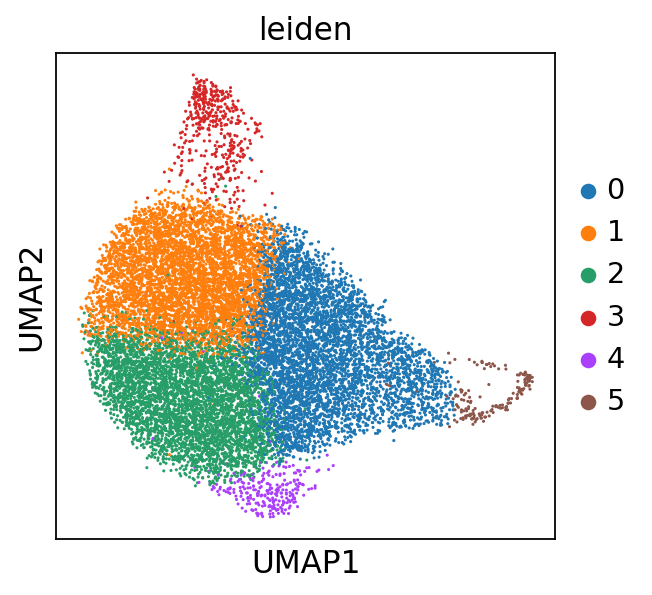

In [26]:
sc.pl.umap(adata, color='leiden')

In [27]:
# rename cluster categories
adata.rename_categories('leiden', ['Metabolism', 'Quiescent', 'Activated', 'Interferon', 'Acute-Activation', 'Cell-cycle'])

In [28]:
adata.uns['leiden_colors'] = ['#279e68', '#1f77b4', '#ff7f0e', '#aa40fc', '#d62728', '#8c564b', '#e377c2']

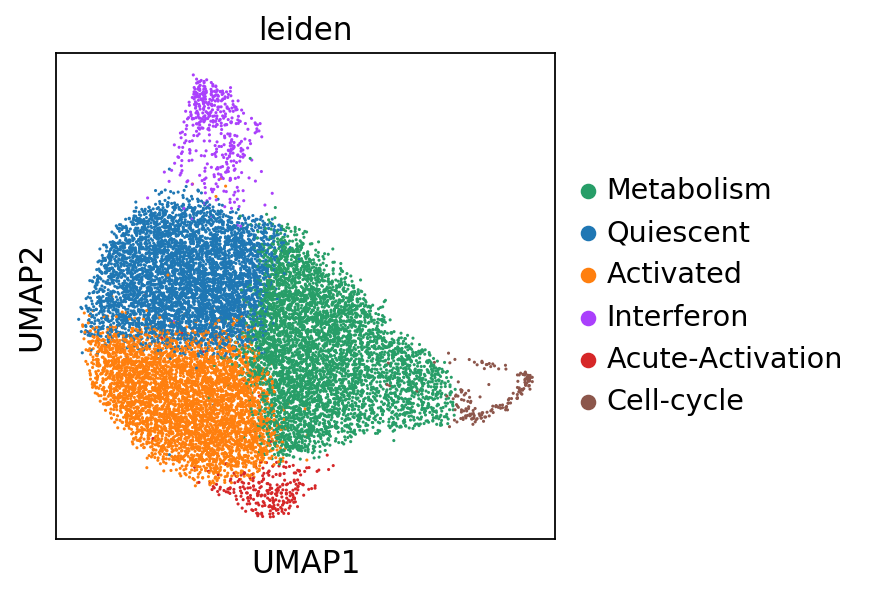

In [29]:
sc.pl.umap(adata, color='leiden', frameon=True, save='_newLTallsamples_umap.pdf')

In [30]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

Metabolism Quiescent Activated Interferon Acute-Activation Cell-cycle
0        Ran     Txnip     Nr4a1      Iigp1            Cebpb      H2afz
1      Eif5a     Rps24      Hes1      Isg15          Tsc22d3      Hmgb2
2        Mif     Rplp1     H3f3b      Ifit1            Plaur      Stmn1
3        Ncl       Fau      Ier2       Gbp7           Ifngr1      Hmgb1
4       Ppia     Mllt3      Junb      Oasl2            Anks1       Ptma
5       Nme1     Rps14      Klf2     Gm4951            Fosl2      Mki67
6       Pfn1      Rpl9       Fos     Ifitm3            Rps27      H2afv
7       Ptma     Rps27     Smad7       Rtp4           Ctla2a      Cks1b
8     Anp32b     Rpl30     Nr4a2       Igtp          Tsc22d1        Ran
9    Slc25a5  Pdzk1ip1      Rgs2     Ifi203            Klf13      Spc24

In [31]:
marker_dic = {'Interferon': ['Iigp1','Isg15','Ifit1', 'Oasl2'],
              'Quiescent': ['Ly6a', 'Procr', 'Hoxb5', 'Ctnnal1', 'Cyp26b1'],
              'Activated': ['Nr4a1','Klf2','Ier2','Fos'],
              'Acute-Activation': ['Fosl2', 'Pde4b','Pde4d', 'Pde10a'],
              'Metabolism': ['Eif5a', 'Hsp90aa1','Nop56', 'Nme1'],
              'Cell cycle': ['Mki67' ,'Top2a', 'Cdk1', 'Spc24']
              }

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`
categories: Metabolism, Quiescent, Activated, etc.
var_group_labels: Interferon, Quiescent, Activated, etc.


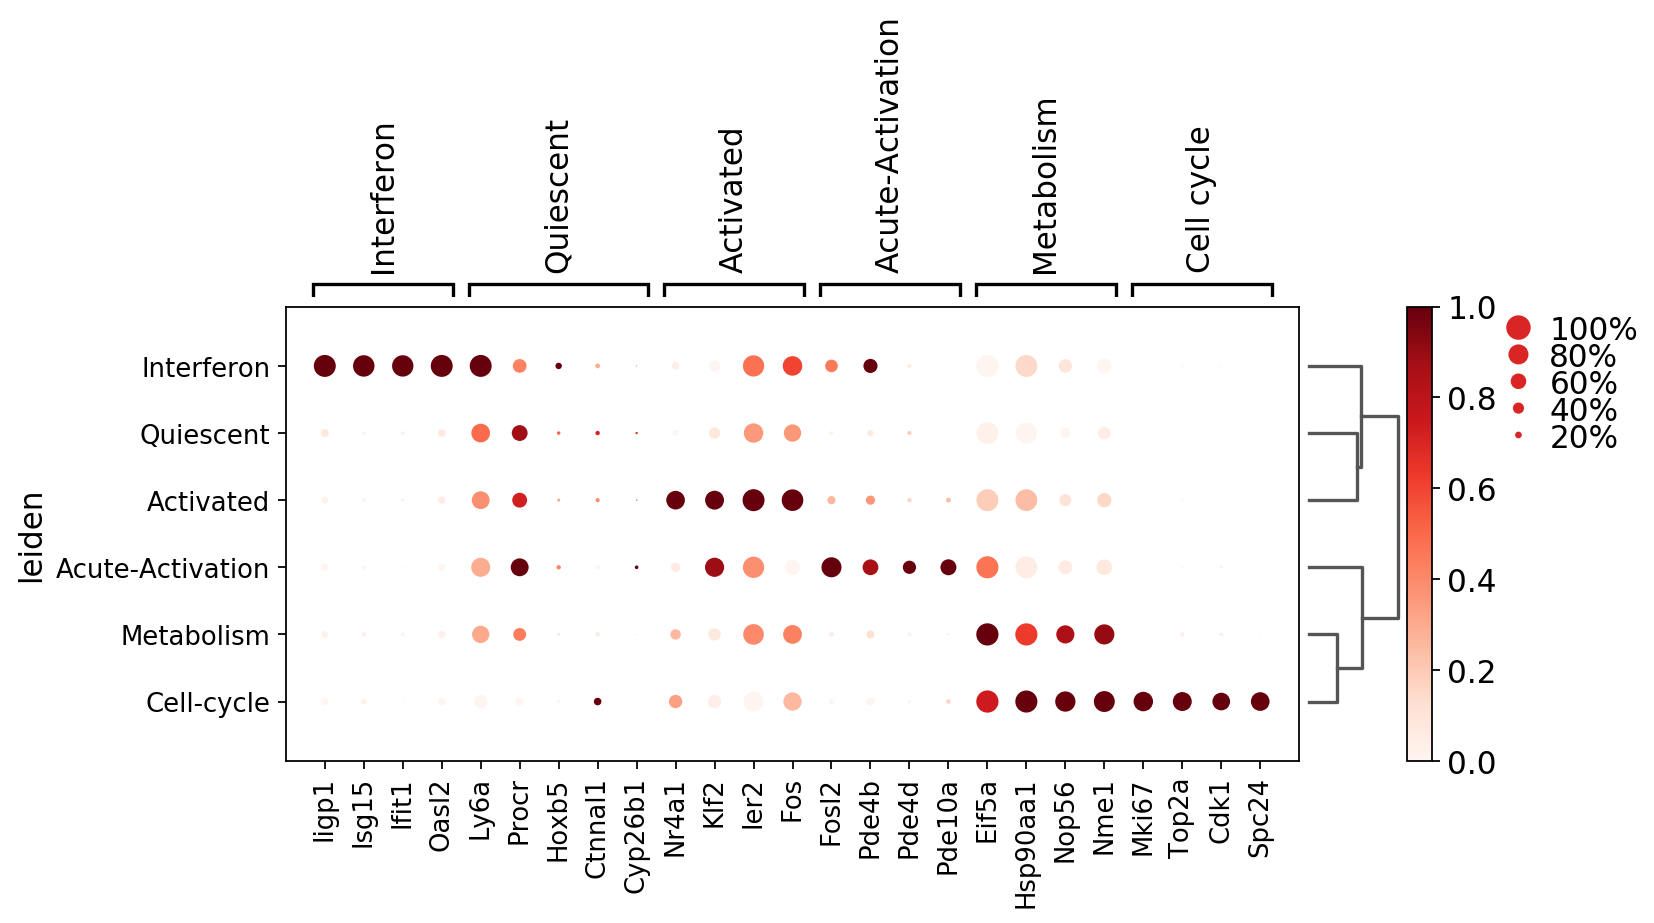

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[8.25, 0.8, 0.2, 0.5, 0.25])

In [32]:
sc.pl.dotplot(adata, marker_dic, groupby='leiden',standard_scale='var', figsize = (10, 4), dendrogram=True, save='_LT_clusters.pdf')

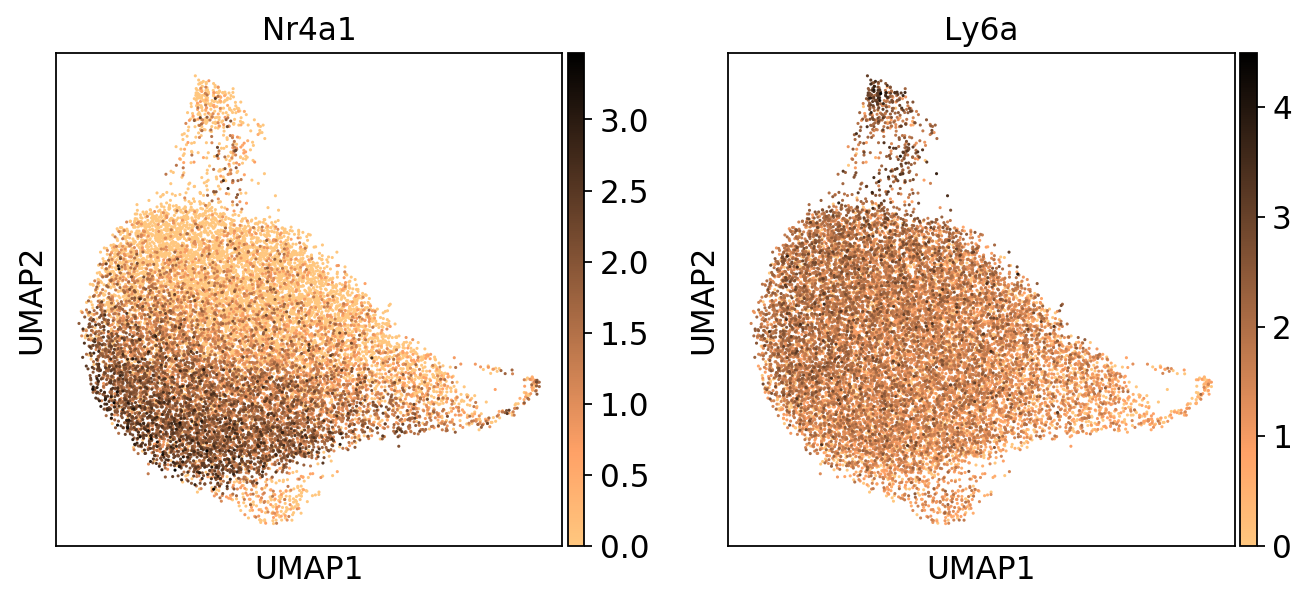

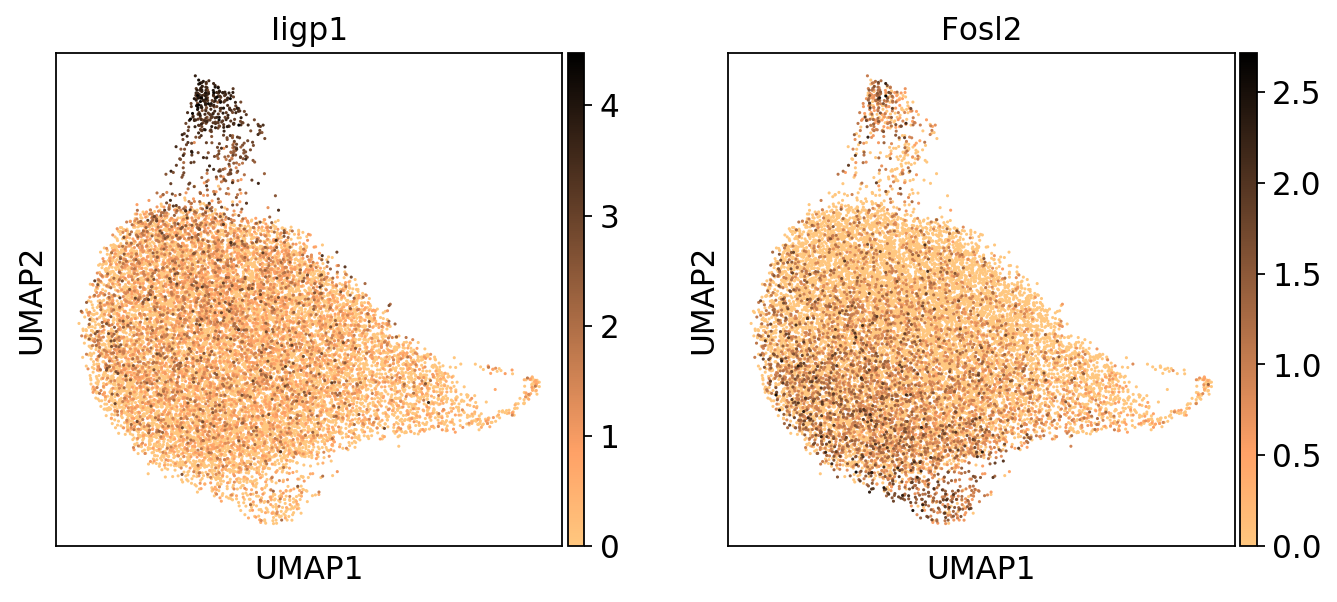

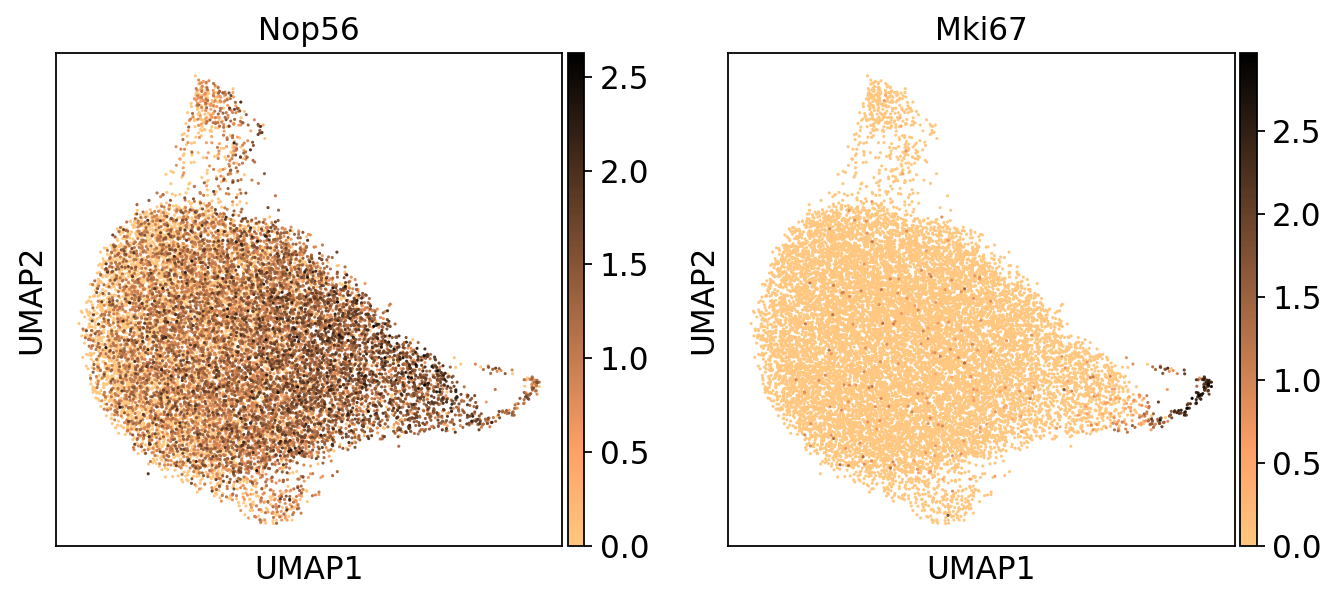

In [33]:
sc.pl.umap(adata, color = ['Nr4a1', 'Ly6a'], cmap = 'copper_r', save='_LT_Nr4a1_Ly6a.pdf')
sc.pl.umap(adata, color = ['Iigp1', 'Fosl2'], cmap = 'copper_r', save='_LT_Iigp1_Fosl2.pdf')
sc.pl.umap(adata, color = ['Nop56', 'Mki67'], cmap = 'copper_r', save='_LT_Nop56_Mki67.pdf')

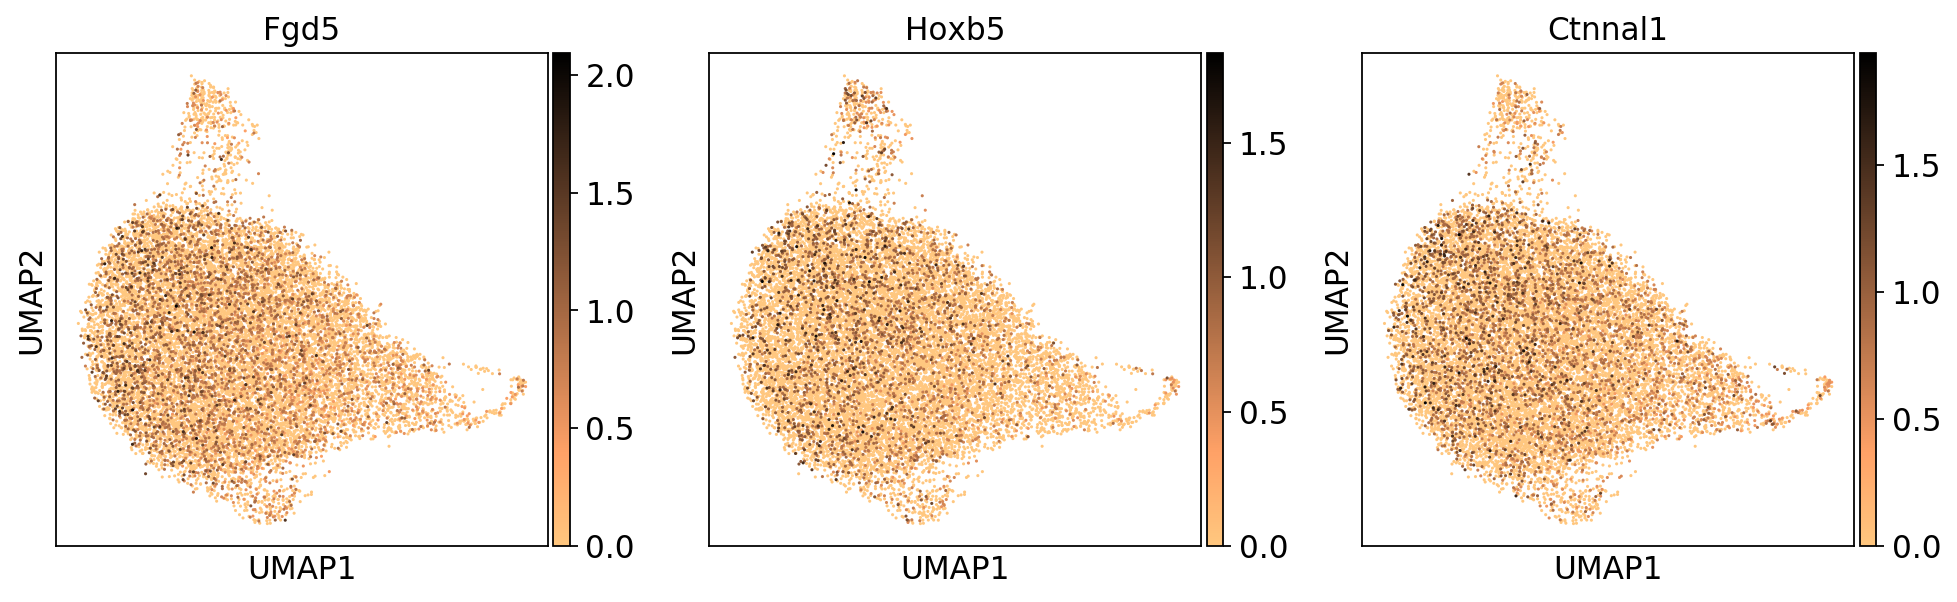

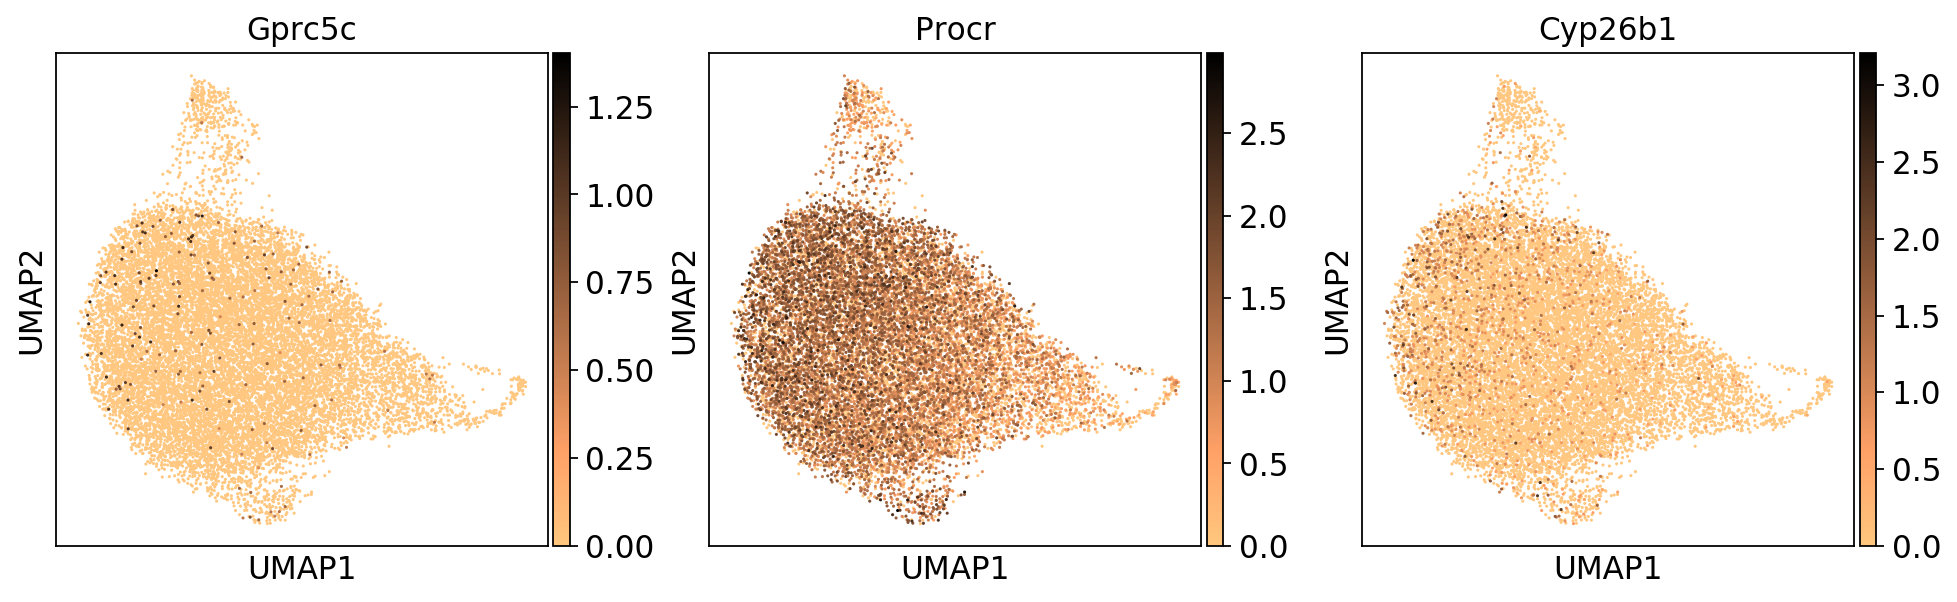

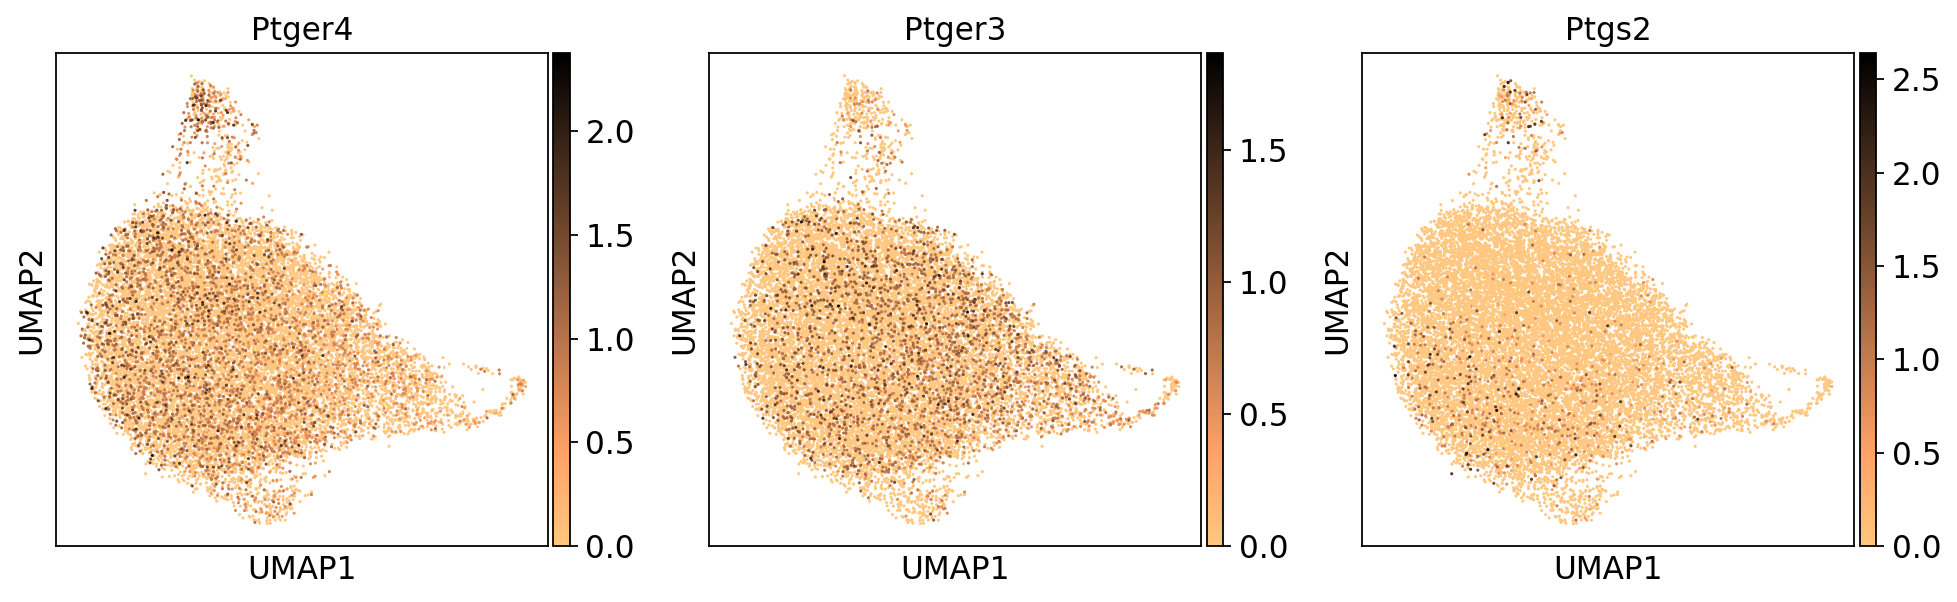

In [34]:
sc.pl.umap(adata, color = ['Fgd5', 'Hoxb5', 'Ctnnal1'], cmap = 'copper_r', save='_LT_Fgd5_Hoxb5_Ctnnal1.pdf')
sc.pl.umap(adata, color = ['Gprc5c', 'Procr', 'Cyp26b1'], cmap = 'copper_r', save='_LT_Gprc5c_Procr_Cyp26b1.pdf' )
sc.pl.umap(adata, color = ['Ptger4', 'Ptger3', 'Ptgs2'], cmap = 'copper_r', save='_LT_Ptger4_Ptger3_Ptgs2.pdf')

### Relationship of clusters and cells from drug treatments

#### How are the cells distributed numbers wise

In [35]:
abs_v = pd.pivot_table(adata.obs, values='sex_sample', index=['leiden'],columns=['sample'], aggfunc=[len])
abs_v = abs_v.fillna(0) #replaces all NaNs with 0
abs_v.columns = abs_v.columns.droplevel(0) # drops columnlevel (=len)
abs_v.to_csv('./write/LT_cell_numbers.csv', index=True, header=True)
abs_v

sample              GCSF      ct  dmPGE2    indo    pIC
leiden                                                 
Metabolism        1204.0  1865.0    83.0  1757.0  188.0
Quiescent          937.0  1981.0    24.0  1816.0  184.0
Activated          780.0  1556.0   108.0  1947.0   58.0
Interferon          21.0    40.0     0.0    58.0  316.0
Acute-Activation     0.0     0.0   261.0     1.0    0.0
Cell-cycle          42.0    79.0     0.0    47.0    2.0

In [36]:
percent_abs_v = abs_v.iloc[:,0:6].div(abs_v.sum(axis=0), axis=1)
percent_abs_v

sample                GCSF        ct    dmPGE2      indo       pIC
leiden                                                            
Metabolism        0.403485  0.337801  0.174370  0.312300  0.251337
Quiescent         0.314008  0.358812  0.050420  0.322787  0.245989
Activated         0.261394  0.281833  0.226891  0.346072  0.077540
Interferon        0.007038  0.007245  0.000000  0.010309  0.422460
Acute-Activation  0.000000  0.000000  0.548319  0.000178  0.000000
Cell-cycle        0.014075  0.014309  0.000000  0.008354  0.002674

In [37]:
percent_abs_v.index.tolist()

['Metabolism',
 'Quiescent',
 'Activated',
 'Interferon',
 'Acute-Activation',
 'Cell-cycle']

In [38]:
percent_abs_v = percent_abs_v.reindex(['Quiescent','Activated','Metabolism', 'Cell-cycle', 
                                     'Interferon','Acute-Activation'])
def_colors = ['#1f77b4', '#ff7f0e', '#279e68', '#8c564b', '#aa40fc', '#d62728', ]

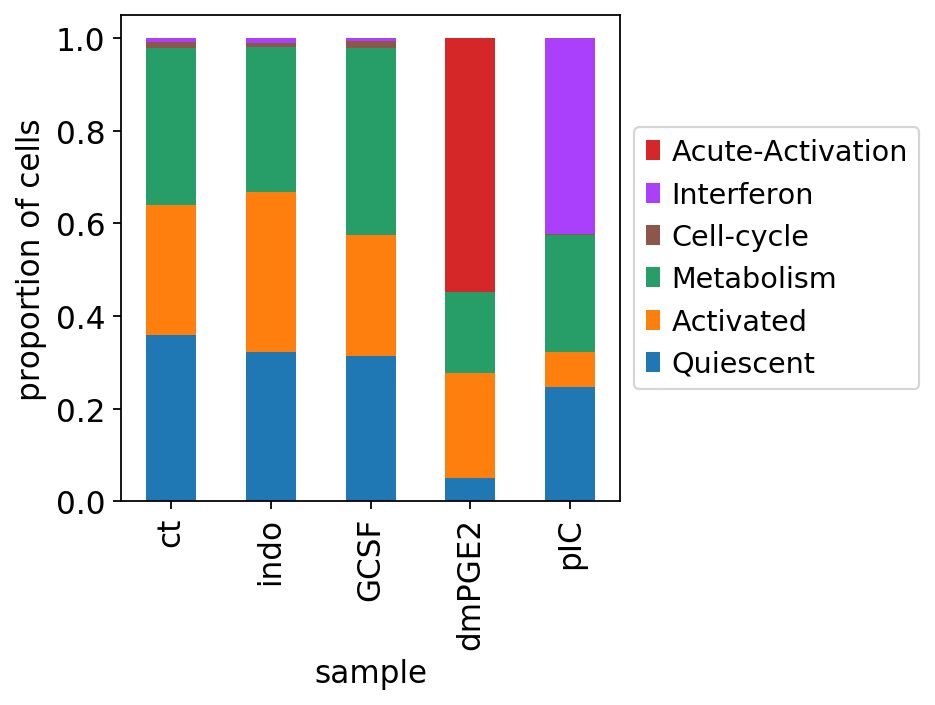

In [39]:
ax = percent_abs_v.T.loc[['ct', 'indo', 'GCSF', 'dmPGE2', 'pIC']].plot.bar(stacked=True, color = def_colors)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("proportion of cells")
plt.grid(b=None) # turns off gridlines
plt.savefig('./figures/LT_leiden_within_treatment.pdf', bbox_inches = "tight")

#### Makeup of the clusters

In [40]:
abs_v_c = pd.pivot_table(adata.obs, values='sex_sample', index=['sample'],columns=['leiden'], aggfunc=[len])
abs_v_c = abs_v_c.fillna(0) #replaces all NaNs with 0
abs_v_c.columns = abs_v_c.columns.droplevel(0) # drops columnlevel (=len)
abs_v_c.to_csv('./write/LT_treatment_within_leiden.csv', index=True, header=True)
abs_v_c

leiden  Metabolism  Quiescent  Activated  Interferon  Acute-Activation  \
sample                                                                   
GCSF        1204.0      937.0      780.0        21.0               0.0   
ct          1865.0     1981.0     1556.0        40.0               0.0   
dmPGE2        83.0       24.0      108.0         0.0             261.0   
indo        1757.0     1816.0     1947.0        58.0               1.0   
pIC          188.0      184.0       58.0       316.0               0.0   

leiden  Cell-cycle  
sample              
GCSF          42.0  
ct            79.0  
dmPGE2         0.0  
indo          47.0  
pIC            2.0

In [41]:
abs_v_c_norm = abs_v_c.iloc[0:5,:].div(abs_v_c.sum(axis=1), axis=0) #normalize for cell numbers
abs_v_c_norm.iloc[:,0:6].div(abs_v_c_norm.sum(axis=0), axis=1)

leiden  Metabolism  Quiescent  Activated  Interferon  Acute-Activation  \
sample                                                                   
GCSF      0.272755   0.243037   0.218973    0.015742          0.000000   
ct        0.228353   0.277715   0.236094    0.016206          0.000000   
dmPGE2    0.117874   0.039024   0.190069    0.000000          0.999676   
indo      0.211114   0.249832   0.289908    0.023061          0.000324   
pIC       0.169903   0.190392   0.064956    0.944991          0.000000   

leiden  Cell-cycle  
sample              
GCSF      0.357127  
ct        0.363063  
dmPGE2    0.000000  
indo      0.211968  
pIC       0.067842

In [42]:
# define some colors to identify samples
abs_v_c_norm = abs_v_c_norm[['Quiescent','Activated','Metabolism', 'Cell-cycle', 
                                     'Interferon','Acute-Activation']]

def_color = ['#A6ACAF', '#2E86C1', '#28B463', '#EC7063', '#884EA0' ]

#https://htmlcolorcodes.com/color-chart/

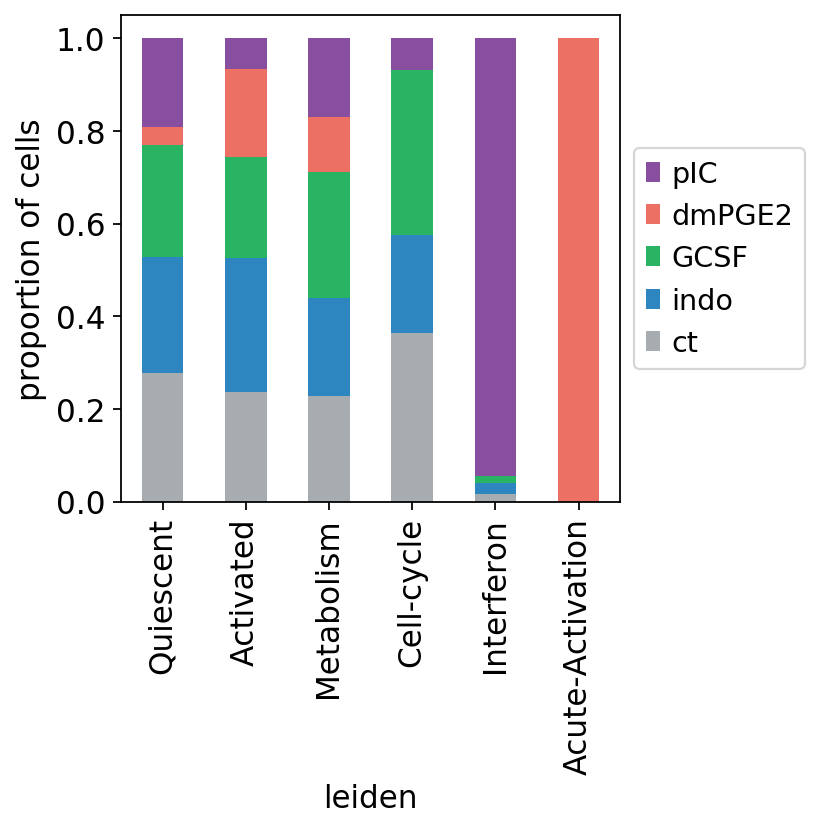

In [43]:
ax = abs_v_c_norm.iloc[:,0:6].div(abs_v_c_norm.sum(axis=0), axis=1).loc[['ct', 'indo', 'GCSF', 'dmPGE2', 'pIC']].T.plot.bar(stacked=True, color = def_color)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("proportion of cells")
plt.grid(b=None) # turns off gridlines
plt.savefig('./figures/LT_treatment_within_leiden.pdf', bbox_inches = "tight")

computing density on 'umap'
--> added
    'umap_density_sample', densities (adata.obs)
    'umap_density_sample_params', parameter (adata.uns)


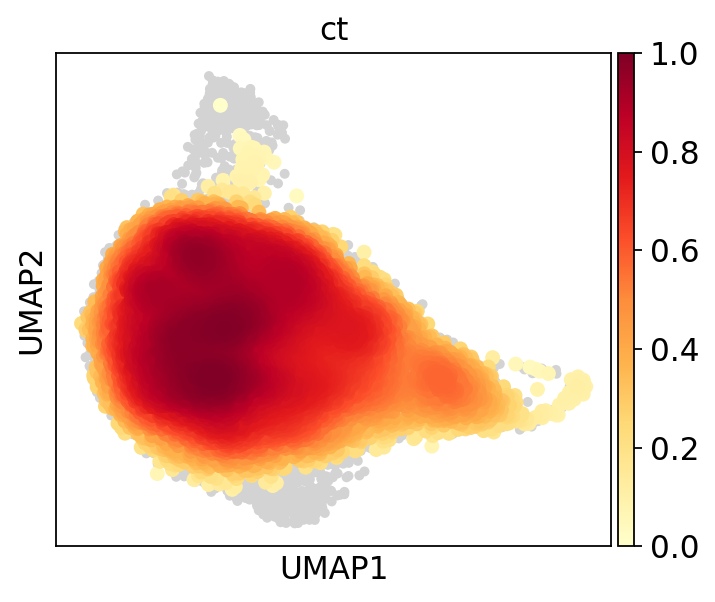

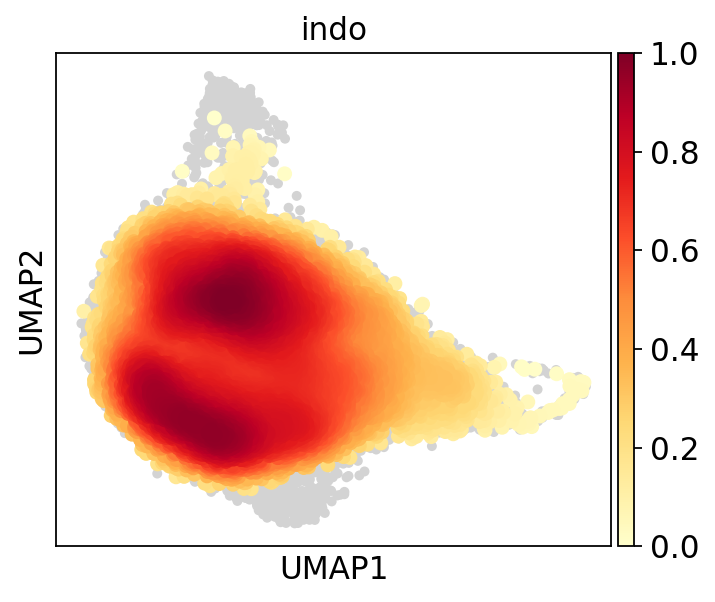

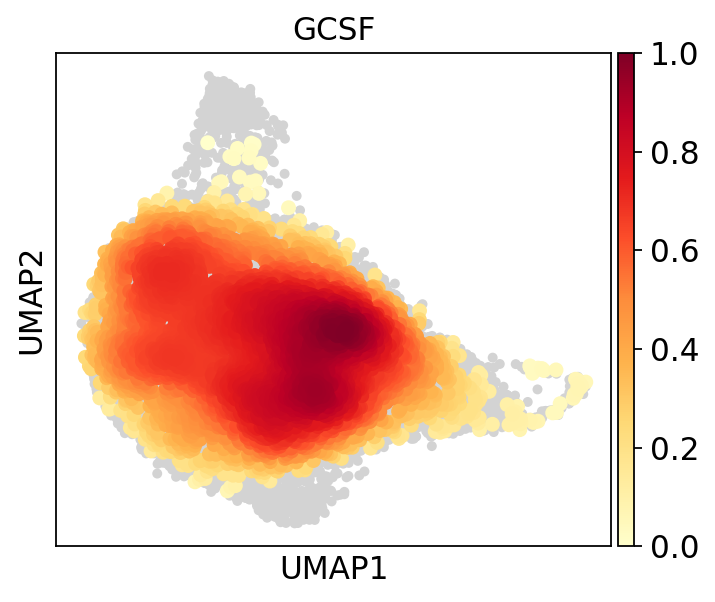

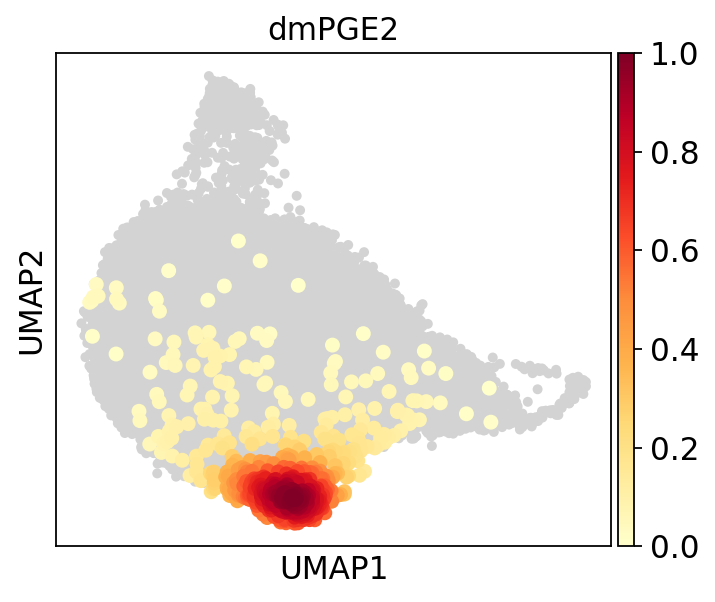

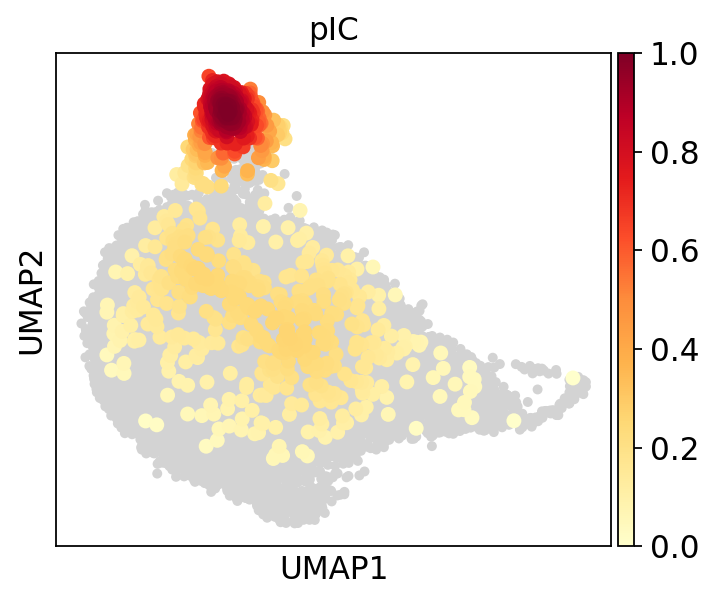

In [44]:
#see where samples localize

#Plot the density
sc.tl.embedding_density(adata, basis='umap', groupby='sample')

adata.obs['sample'].value_counts()
sc.pl.embedding_density(adata, basis='umap', key='umap_density_sample', group='ct', save='density_ct.pdf')
sc.pl.embedding_density(adata, basis='umap', key='umap_density_sample', group='indo', save='density_indo.pdf')
sc.pl.embedding_density(adata, basis='umap', key='umap_density_sample', group='GCSF', save='density_GCSF.pdf')
sc.pl.embedding_density(adata, basis='umap', key='umap_density_sample', group='dmPGE2', save='density_dmPGE2.pdf')
sc.pl.embedding_density(adata, basis='umap', key='umap_density_sample', group='pIC', save='density_pIC.pdf')

# Save enrichment as .pdf

In [45]:
# this makes a multipage pdf document
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('./figures/clusterenrichment.pdf')

sources = ["REAC"]
background_genes = adata.var_names.tolist()

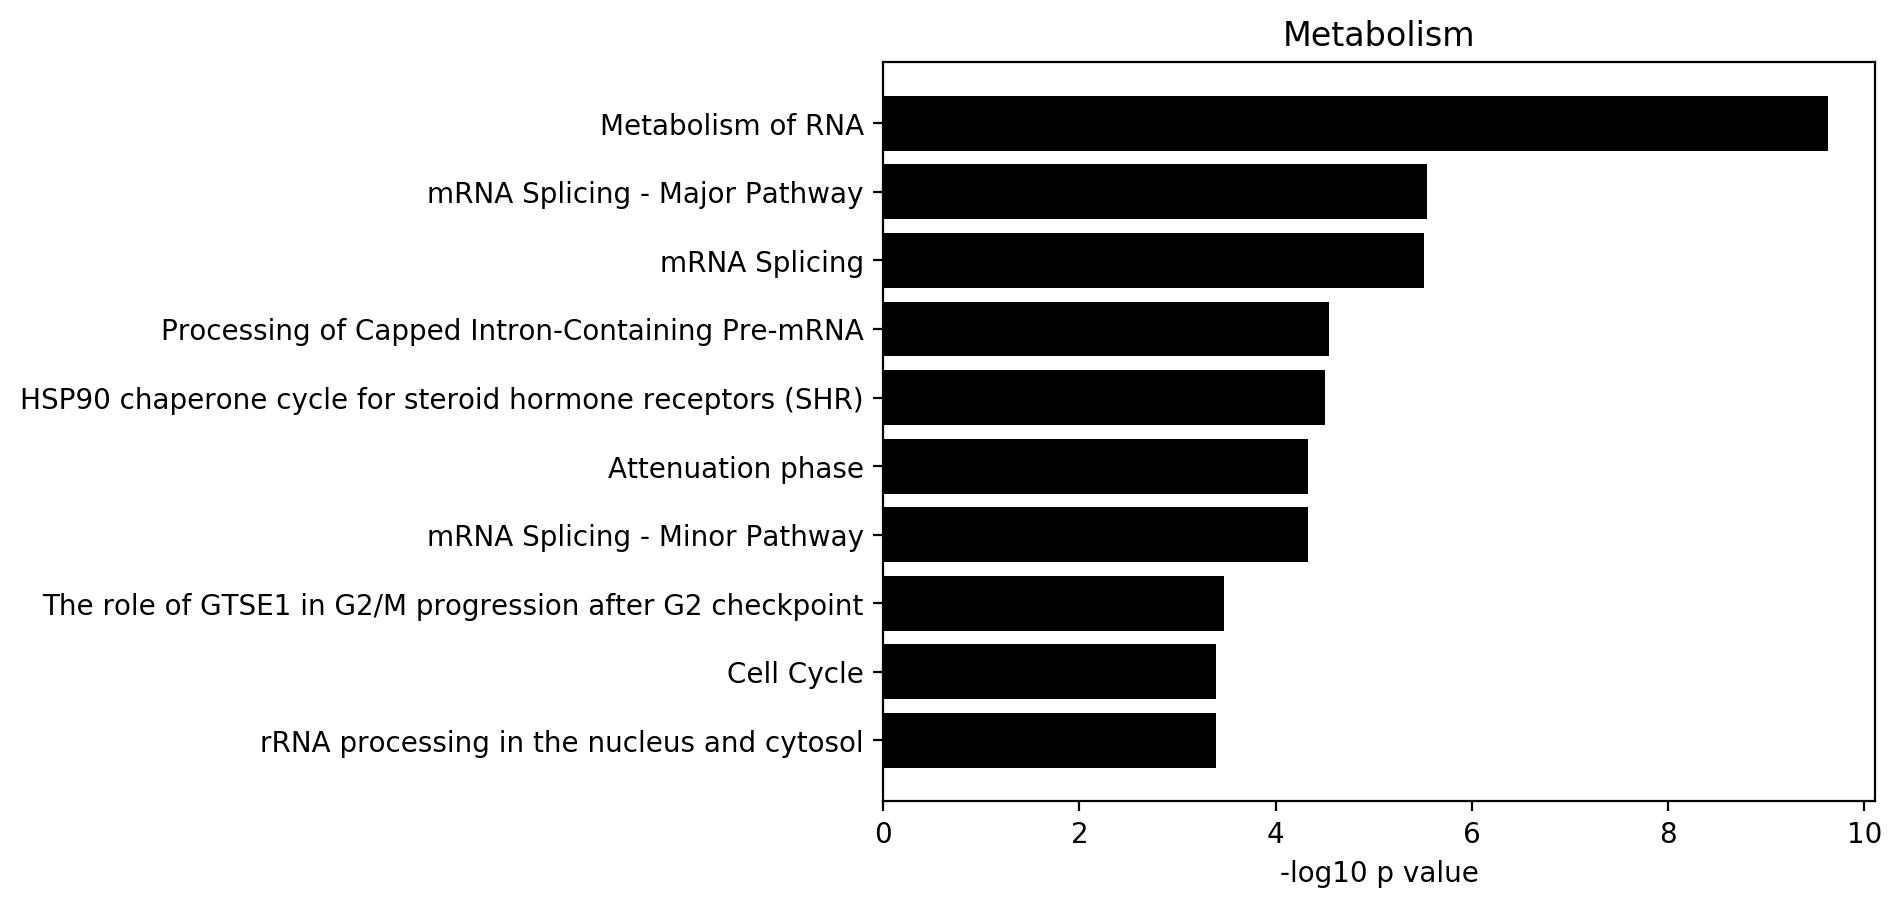

In [46]:
pathway_enrich_plot(enrichment_clusters['0_n'].tolist(), sources, 'Metabolism', background_genes, pp, save = True)

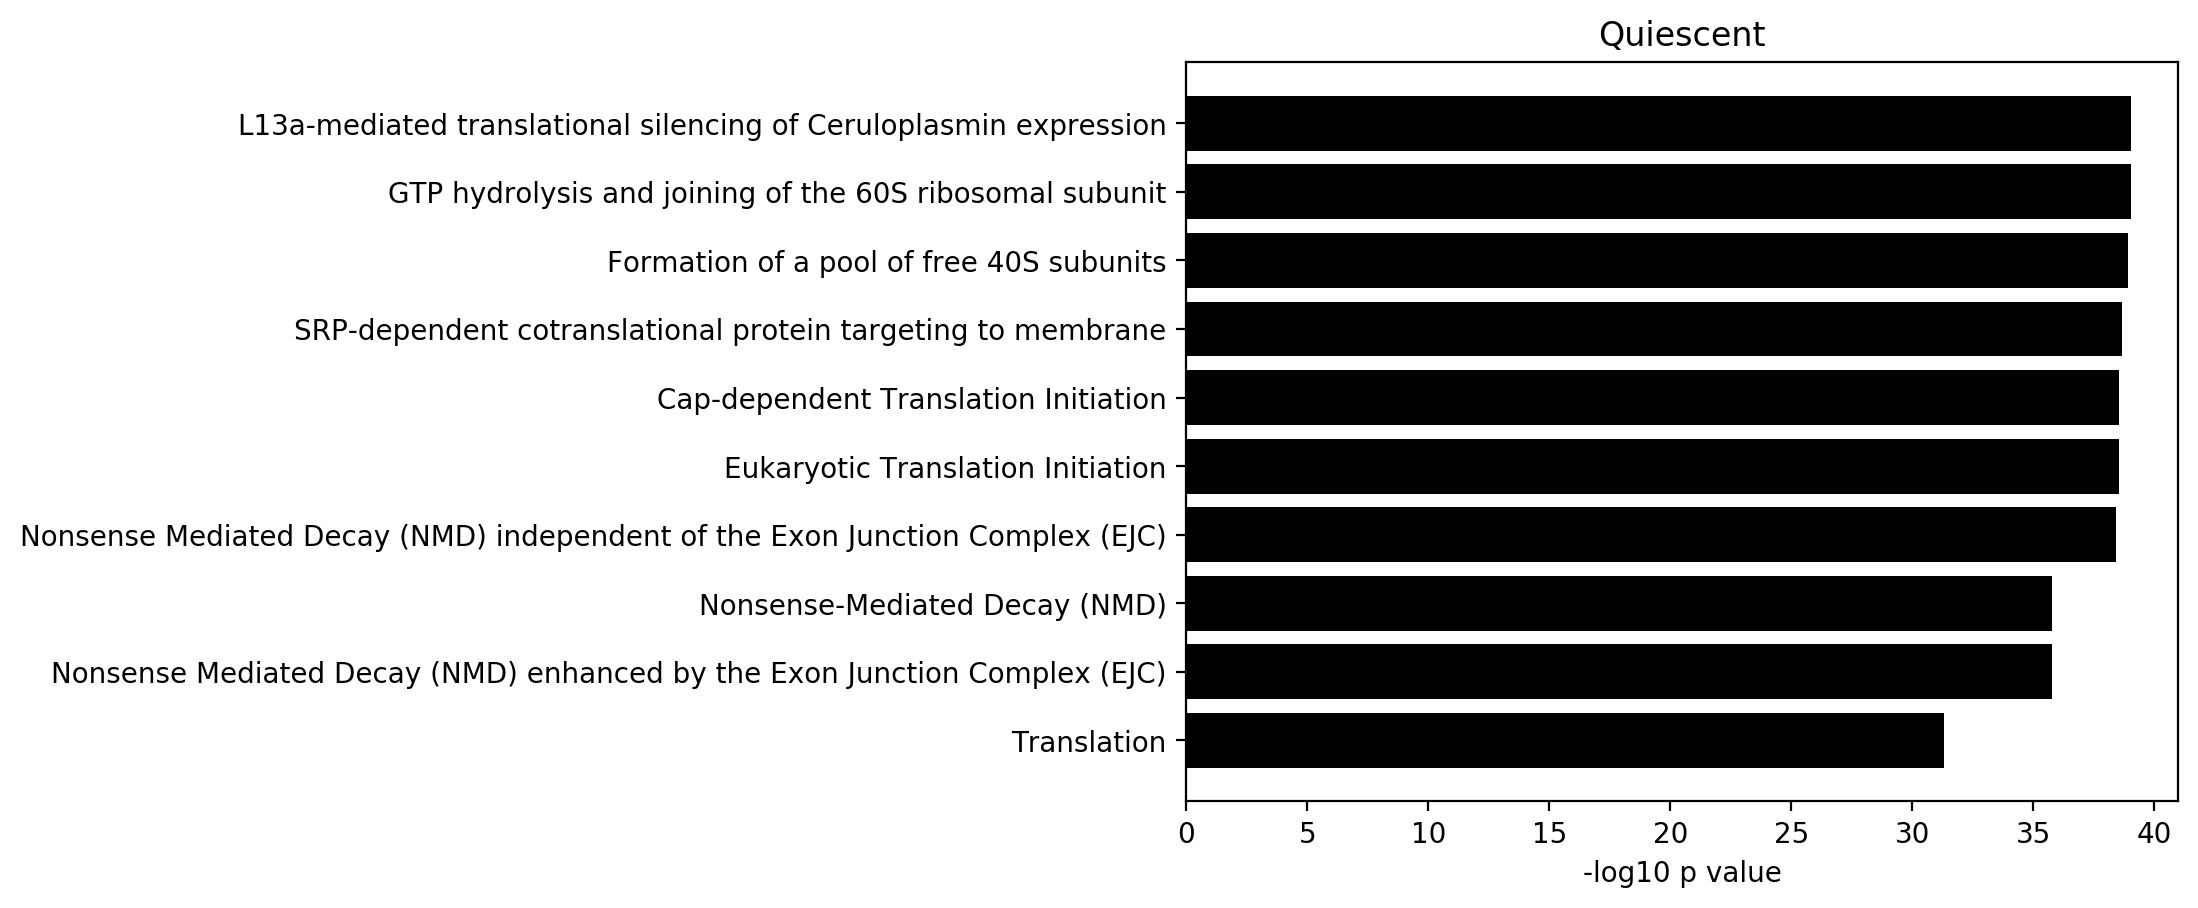

In [47]:
pathway_enrich_plot(enrichment_clusters['1_n'].tolist(), sources, 'Quiescent', background_genes, pp, save = True)

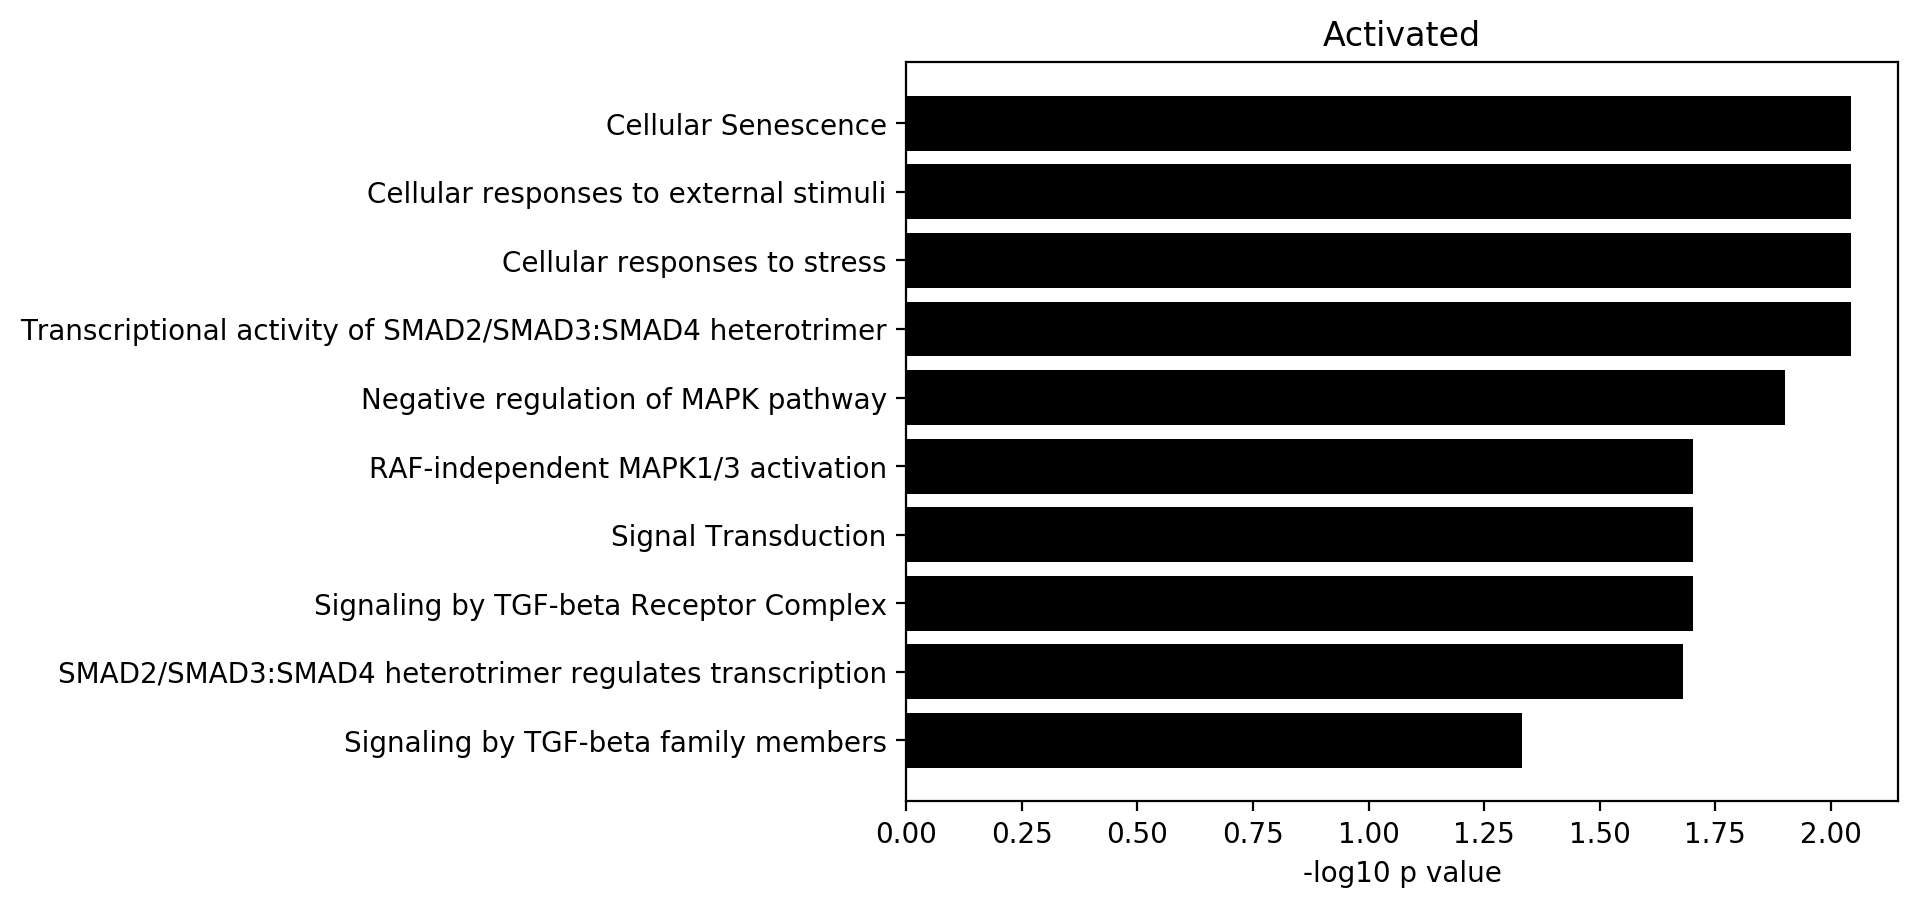

In [48]:
pathway_enrich_plot(enrichment_clusters['2_n'].tolist(), sources, 'Activated', background_genes, pp, save = True)

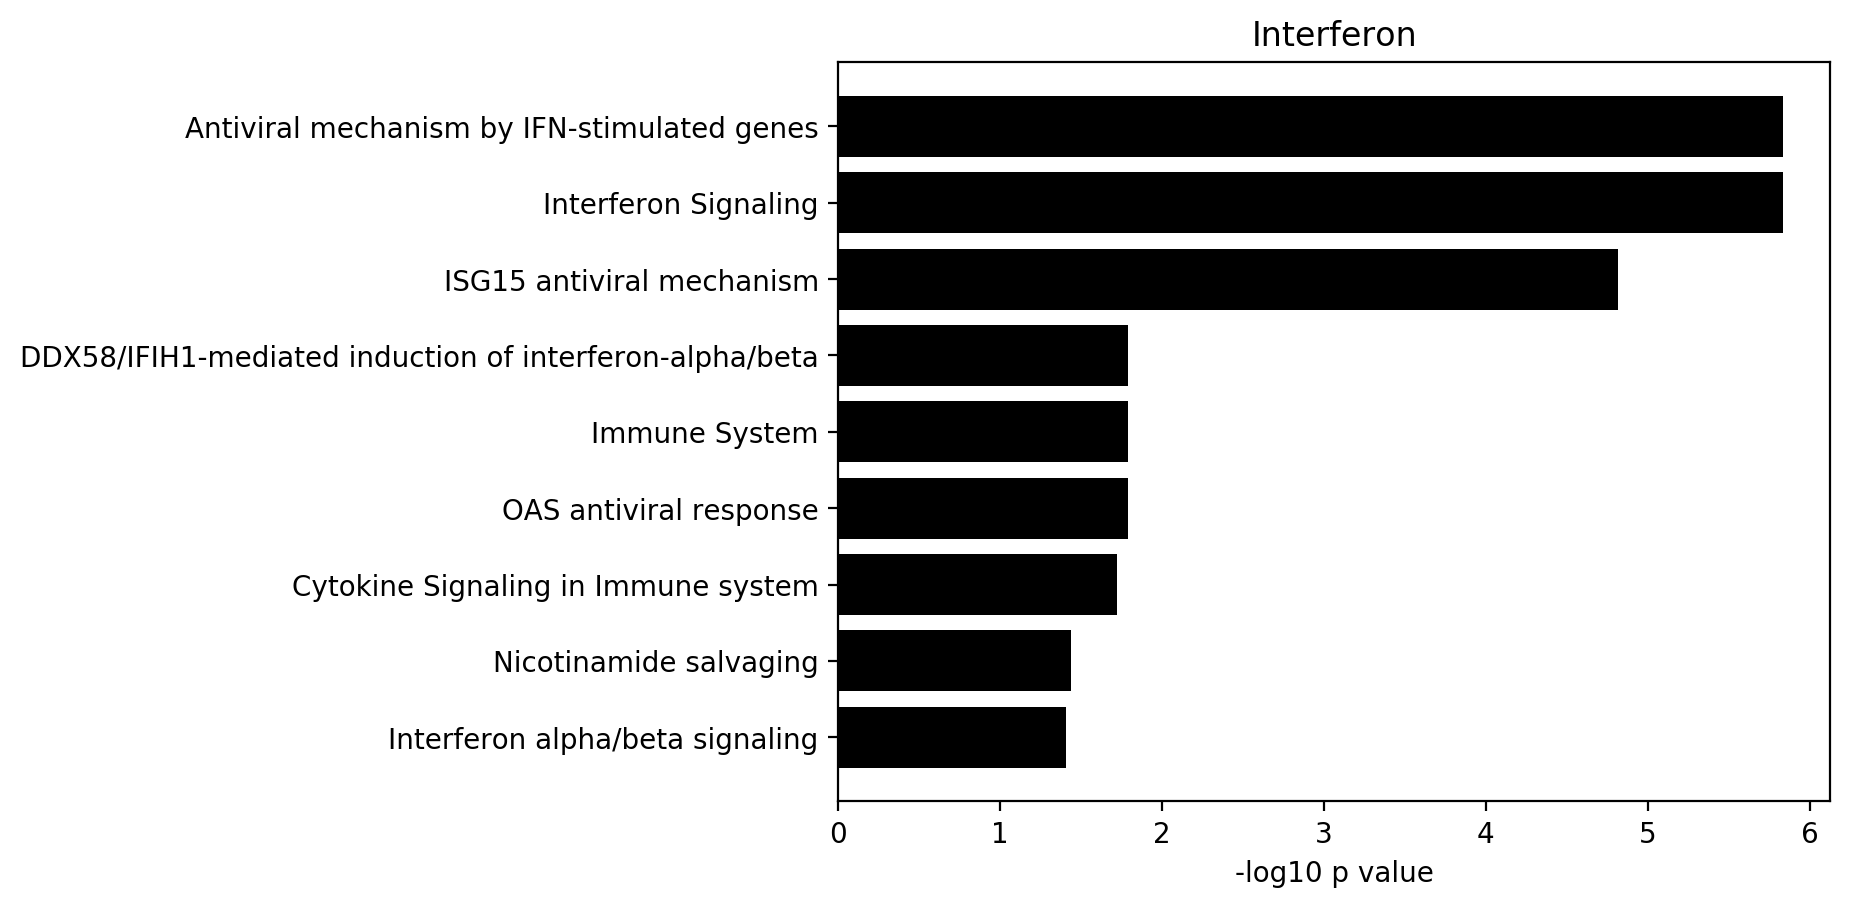

In [49]:
pathway_enrich_plot(enrichment_clusters['3_n'].tolist(), sources, 'Interferon', background_genes, pp, save = True)

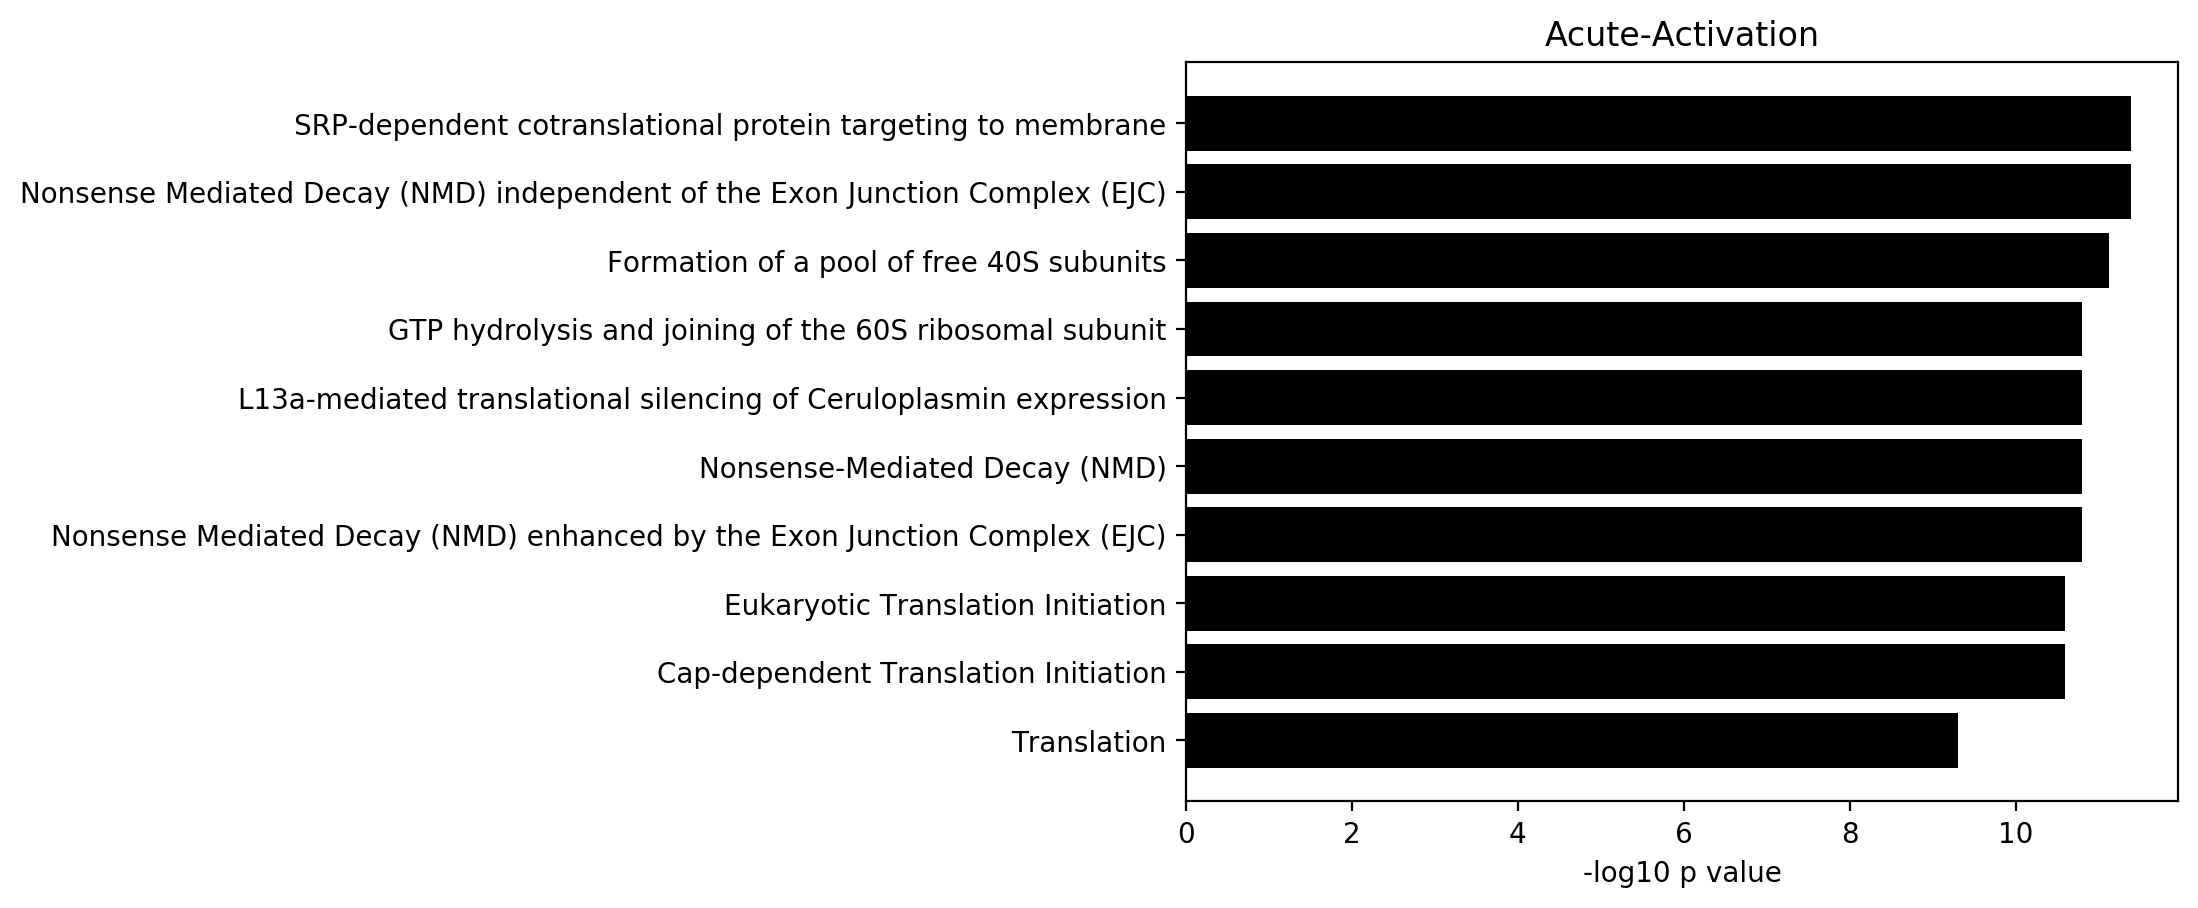

In [50]:
pathway_enrich_plot(enrichment_clusters['4_n'].tolist(), sources, 'Acute-Activation', background_genes, pp, save = True)

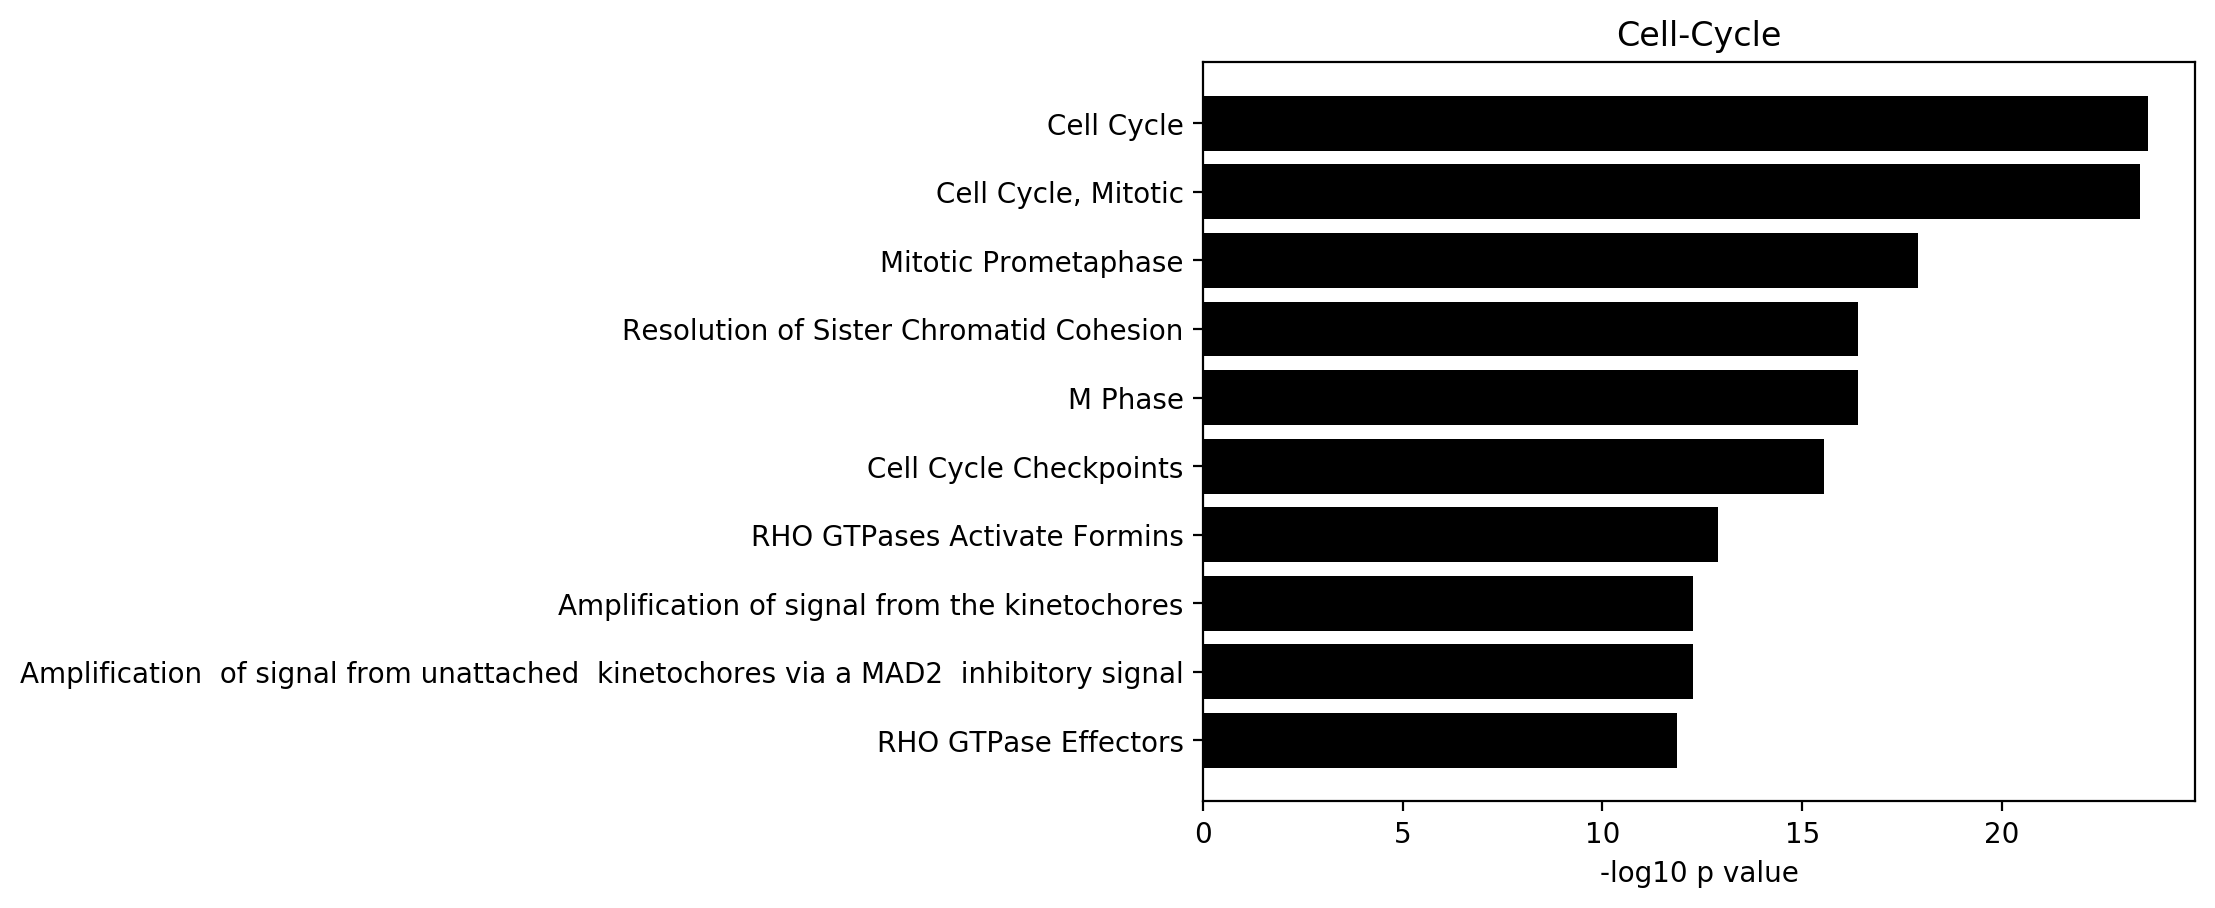

In [51]:
pathway_enrich_plot(enrichment_clusters['5_n'].tolist(), sources, 'Cell-Cycle', background_genes, pp, save = True)

In [52]:
# close the multipage pdf
pp.close()

In [53]:
%pip list

Package                Version            
---------------------- -------------------
alembic                1.3.0              
anndata                0.7.1              
async-generator        1.10               
attrs                  19.3.0             
backcall               0.1.0              
beautifulsoup4         4.8.1              
bleach                 3.1.0              
blinker                1.4                
bokeh                  1.3.4              
cellbrowser            0.7.7              
certifi                2020.4.5.1         
certipy                0.1.3              
cffi                   1.13.2             
chardet                3.0.4              
Click                  7.0                
cloudpickle            1.2.2              
conda                  4.7.12             
conda-package-handling 1.6.0              
cryptography           2.8                
cycler                 0.10.0             
Cython                 0.29.14            
cytoolz    

In [54]:
sc.logging.print_versions()
pd.show_versions()

scanpy==1.4.6 anndata==0.7.1 umap==0.4.1 numpy==1.17.3 scipy==1.3.1 pandas==0.25.3 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.8.0 louvain==0.6.1

INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.3.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.19.76-linuxkit
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 0.25.3
numpy            : 1.17.3
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 19.3.1
setuptools       : 41.6.0.post20191101
Cython           : 0.29.14
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.9.0
pan